# MASINSKO UCENJE DRUGI PROJEKAT
---

*Nada Jovanovic 1618*  
*Milica Jovanovic 1636*


## Import
---

In [280]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN

from numpy import mean
from numpy import std
from numpy import percentile

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score, adjusted_rand_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from sklearn.datasets import make_moons

from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


## Dataset
---

In [281]:
data = pd.read_csv("data.csv")
data = data.drop(columns = [data.columns[0]])

data1 = data.copy()

data.head()

Brand  Current Price  Original Price  Discount Percentage  Rating  \
0       noise        82990.0         89900.0             7.686318     4.0   
1  fire-boltt         3799.0         16999.0            77.651627     4.3   
2        boat         1999.0          7990.0            74.981227     3.8   
3  fire-boltt         1799.0         19999.0            91.004550     4.3   
4       noise         1599.0          4999.0            68.013603     4.1   

   Number OF Ratings                              Model Name Dial Shape  \
0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk        NaN   
1            20788.0                                  BSW046        NaN   
2            21724.0                               Wave Call        NaN   
3            13244.0                                  BSW053        NaN   
4            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN   

  Strap Color Strap Material Touchscreen  Battery Life (Days) Bluetooth  \
0         NaN            NaN         NaN                  8.0       Yes   
1         NaN        Silicon         Yes                  3.5       Yes   
2         NaN        Silicon         Yes                  8.0       Yes   
3         NaN        Silicon         Yes                  3.5       Yes   
4         NaN          Other         Yes                  8.0       Yes   

  Display Size     Weight  
0          NaN  35 - 50 g  
1   1.8 inches  50 - 75 g  
2   1.7 inches  35 - 50 g  
3   1.8 inches      75g +  
4   1.7 inches  35 - 50 g

In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                450 non-null    object 
 1   Current Price        440 non-null    float64
 2   Original Price       377 non-null    float64
 3   Discount Percentage  377 non-null    float64
 4   Rating               444 non-null    float64
 5   Number OF Ratings    391 non-null    float64
 6   Model Name           415 non-null    object 
 7   Dial Shape           327 non-null    object 
 8   Strap Color          327 non-null    object 
 9   Strap Material       381 non-null    object 
 10  Touchscreen          413 non-null    object 
 11  Battery Life (Days)  418 non-null    float64
 12  Bluetooth            444 non-null    object 
 13  Display Size         420 non-null    object 
 14  Weight               264 non-null    object 
dtypes: float64(6), object(9)
memory usage: 5

In [283]:
data.describe()

Current Price  Original Price  Discount Percentage      Rating  \
count     440.000000      377.000000           377.000000  444.000000   
mean    12747.554545    14598.204244            48.236894    4.031306   
std     17760.666099    15450.028869            24.109830    0.550548   
min      1199.000000     1669.000000           -79.688436    1.000000   
25%      2180.750000     5999.000000            33.337037    3.900000   
50%      3999.000000     7999.000000            54.550414    4.100000   
75%     17121.750000    17999.000000            66.677780    4.300000   
max    139990.000000    96390.000000            91.004550    5.000000   

       Number OF Ratings  Battery Life (Days)  
count         391.000000           418.000000  
mean        11594.726343            14.077392  
std         40423.889227             7.718503  
min             1.000000             0.750000  
25%            68.500000             8.000000  
50%           996.000000            17.500000  
75%          6022.000000            22.000000  
max        619130.000000            22.000000

## Vizuelizacija podataka
---


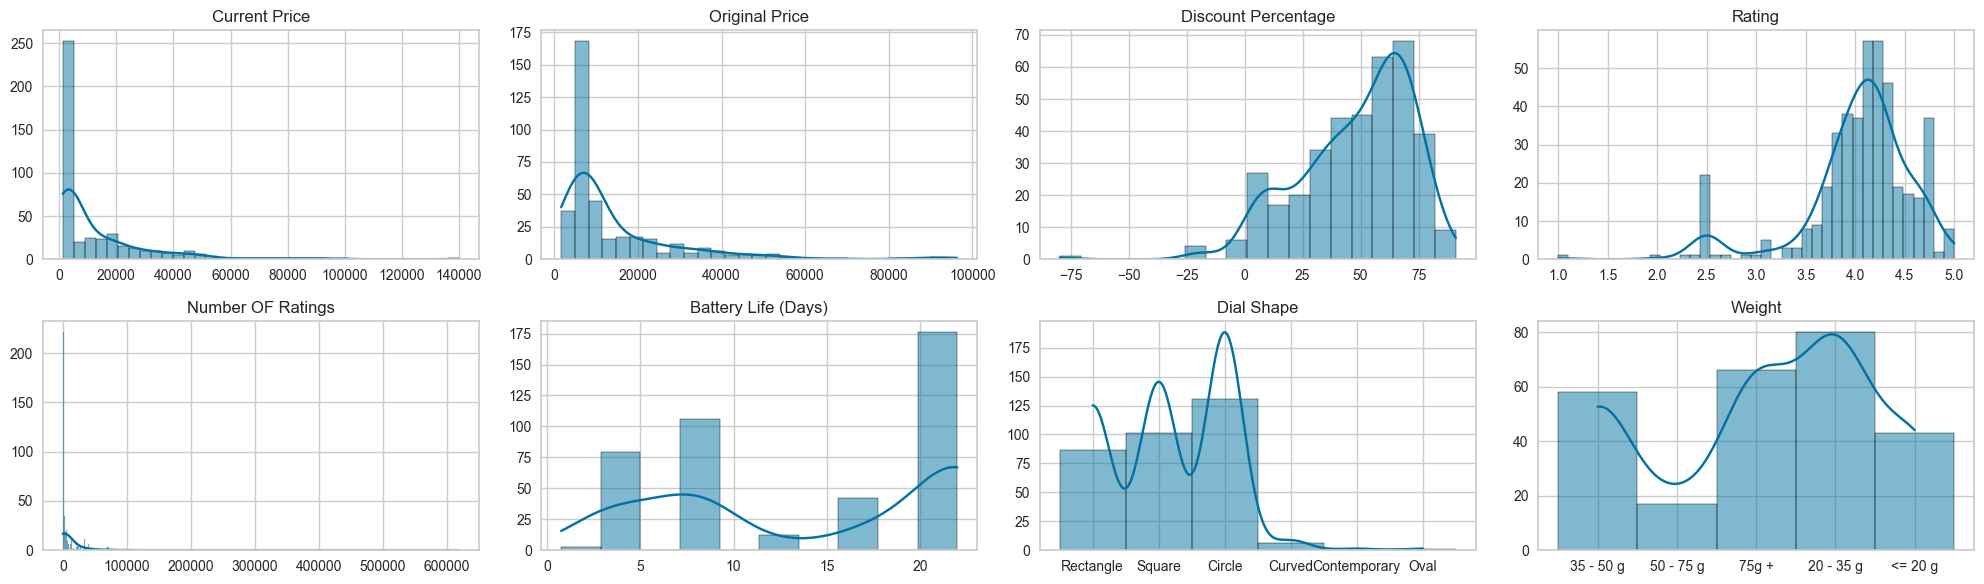

In [284]:
columns_num = ['Current Price', 'Original Price', 'Discount Percentage', 'Rating', 'Number OF Ratings','Battery Life (Days)', 'Dial Shape', 'Weight']

fig, axes = plt.subplots(2, 4, figsize=(20, 6))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

Moze se uociti da **Current Price**, **Original Price** i **Number OF Rating** imaju neke ekstremne vrednosti koje bi mozda trebalo ukloniti, dok **Discount percentage** sadrzi negetivne vrednosti koje treba prebaciti u pozitivne.

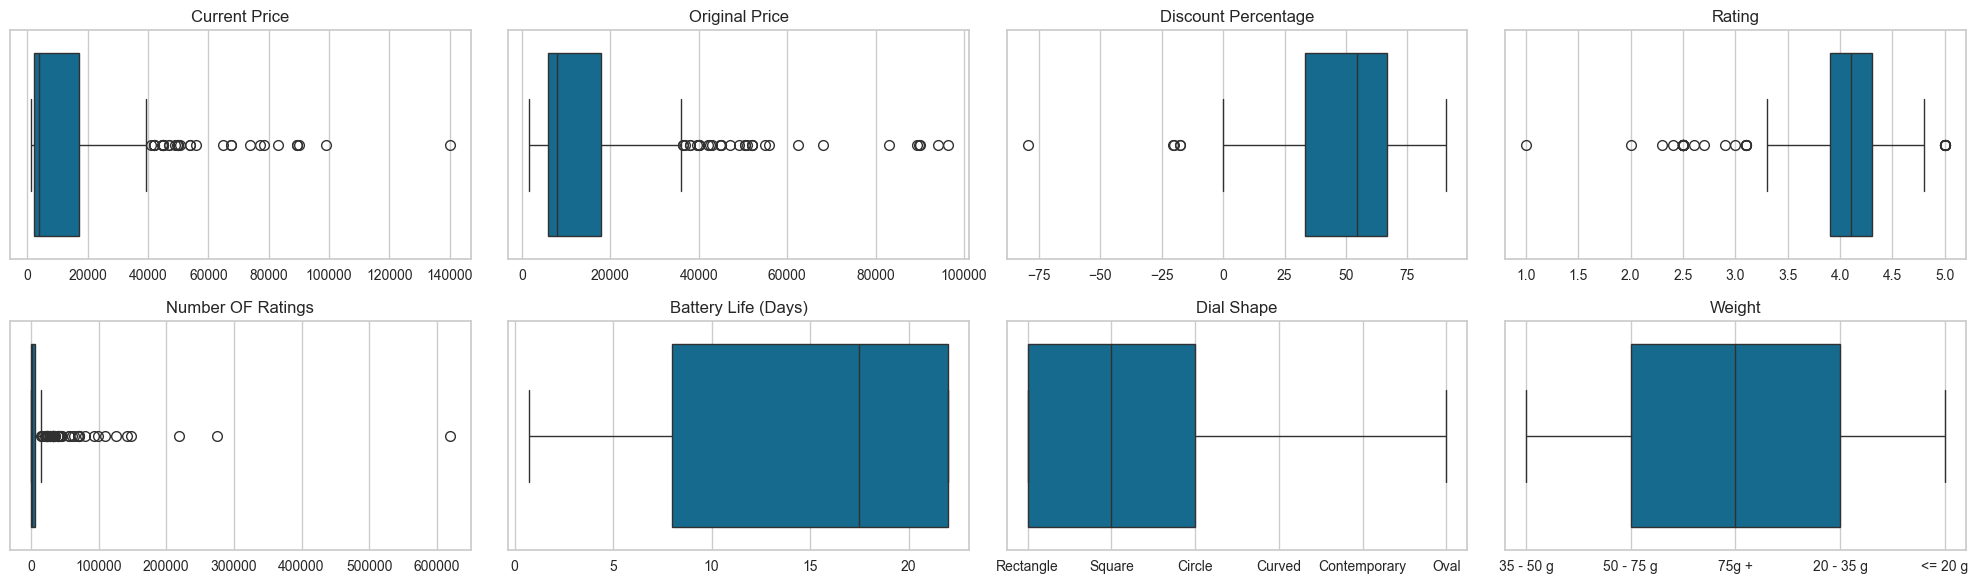

In [285]:

columns_num = ['Current Price', 'Original Price', 'Discount Percentage', 'Rating', 'Number OF Ratings','Battery Life (Days)', 'Dial Shape', 'Weight']

fig, axes = plt.subplots(2, 4, figsize=(20, 6))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.boxplot( x=column_name,  ax=axes[i], data=data)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()


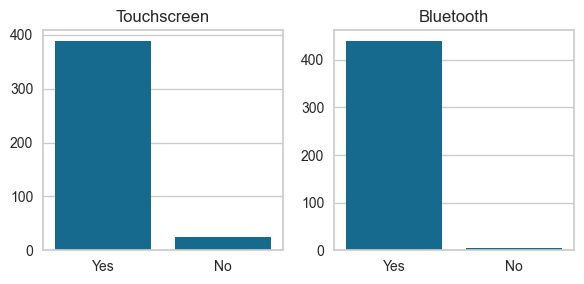

In [286]:
columns_num = ['Touchscreen', 'Bluetooth']

fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.countplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

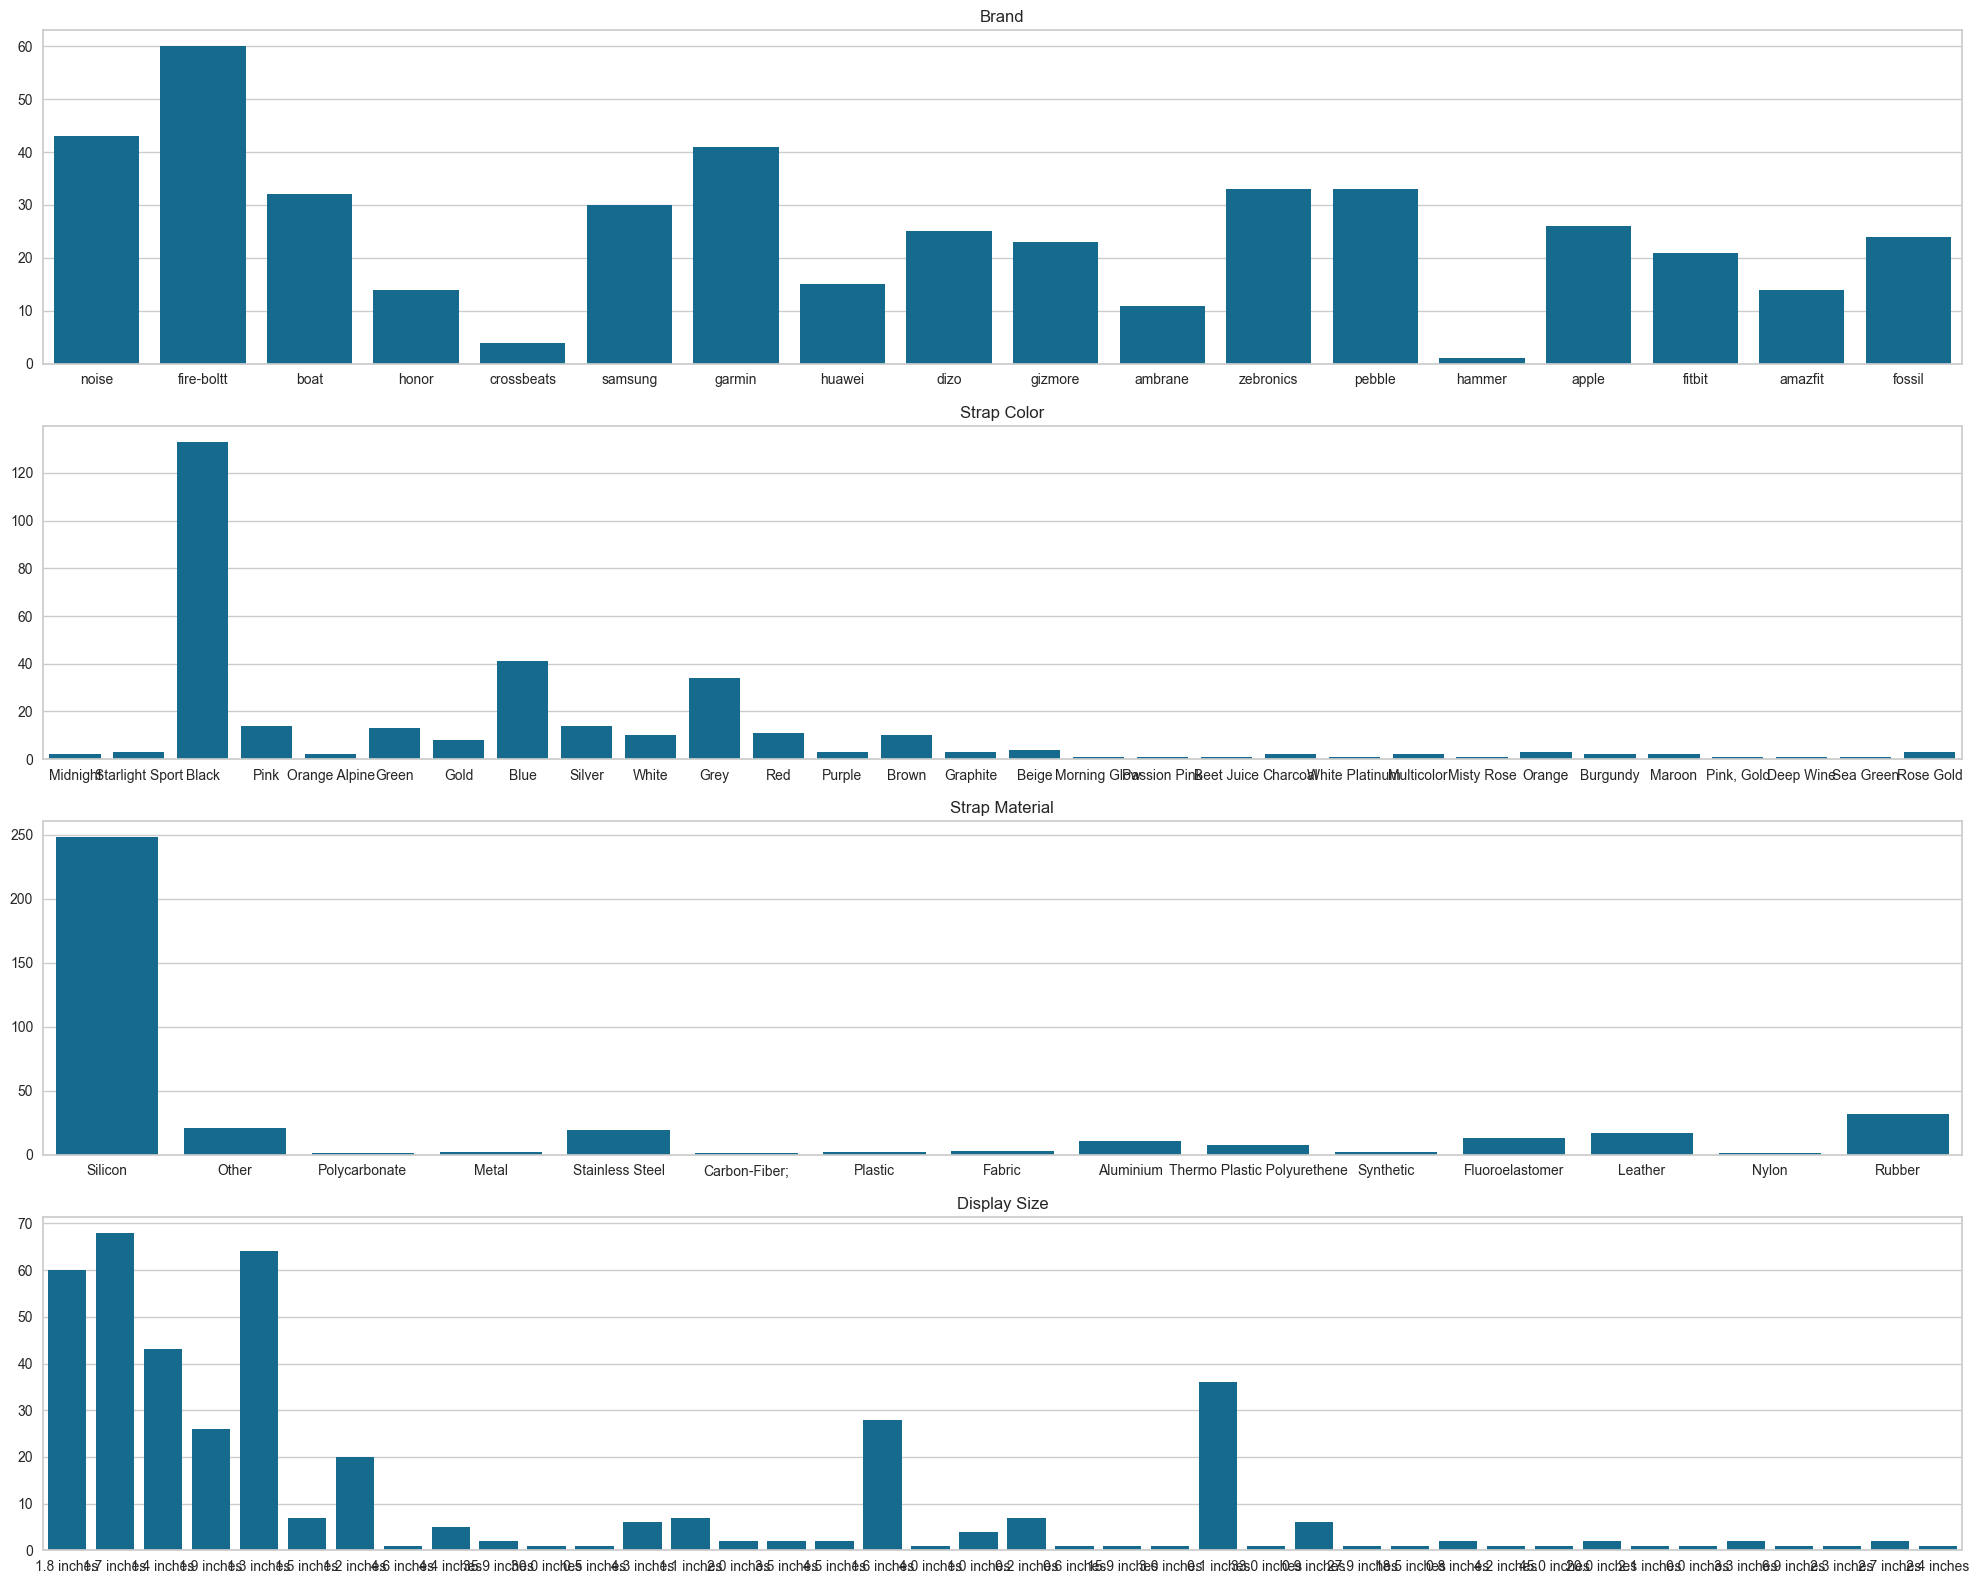

In [287]:
columns_num = ['Brand', 'Strap Color', 'Strap Material', 'Display Size']

fig, axes = plt.subplots(4, 1, figsize=(20, 16))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.countplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('', fontsize=15)
    axes[i].set_ylabel('')
    axes[i].FontSize = 5

plt.tight_layout()
plt.show()

Kod ovih kategorickig podataka može se uočiti dosta kategorija, koje bi trebalo grupisati na što manje grupa.

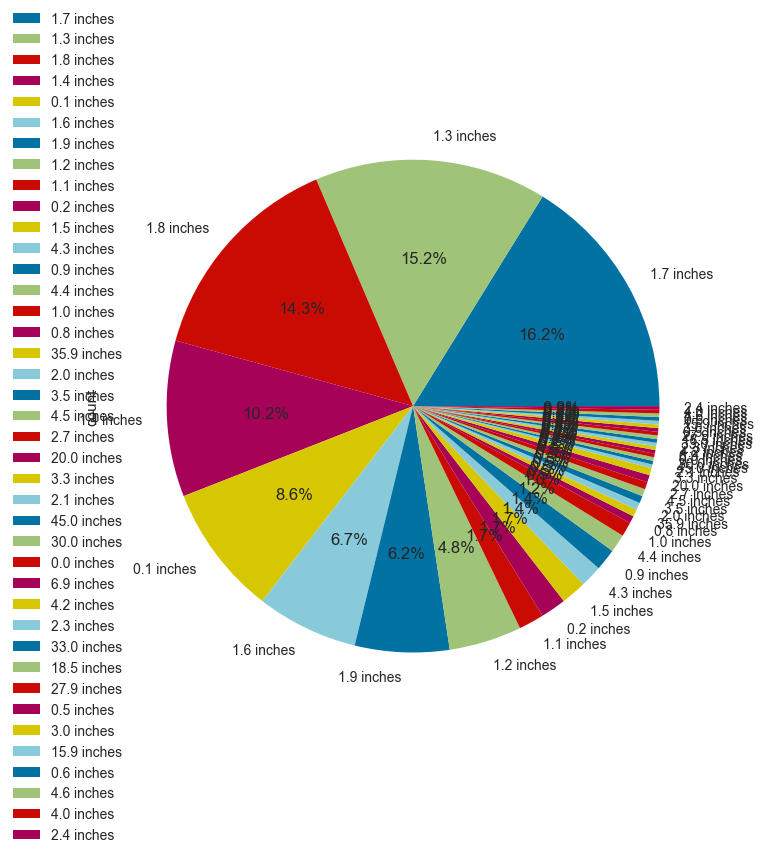

In [288]:

plt.figure(figsize=(8, 8))
pie = data["Display Size"].value_counts().plot(kind='pie',  autopct='%0.1f%%')
pie.figure.legend(loc="upper left")
plt.show()

## Transformacija podataka
----

Provera i uklanjenje duplikata:

In [289]:
print("Number Of Rows In The Original DataFrame:", len(data))

data = data.drop_duplicates()

print("Number Of Rows After Deduping:", len(data))

data1 = data1.drop_duplicates()

Number Of Rows In The Original DataFrame: 450
Number Of Rows After Deduping: 440


In [290]:
data1 = data1.drop(columns=['Model Name'])

### Određivanje i rešavanje outliera

#### Standard Deviation Method

In [291]:
columns = ['Current Price', 'Original Price',  'Number OF Ratings']

for column in columns:
    data_mean, data_std = mean(data[column]), std(data[column])
    cut_off = data_std * 2
    lower, upper = data_mean - cut_off, data_mean + cut_off

    outliers = [x for x in data[column] if x < lower or x > upper]
    data_no_outliers = data[(data[column] >= lower) & (data[column] <= upper)]

    print(f"{column} Identified outliers: {len(outliers)} ")

Current Price Identified outliers: 21 
Original Price Identified outliers: 18 
Number OF Ratings Identified outliers: 9 


#### Interquartile Range Method

In [292]:
for column in columns:
    q25, q75 = percentile(data[column], 25), percentile(data[column], 75)
    iqr = q75 - q25
  
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    outliers = [x for x in data[column] if x < lower or x > upper]

    print(f"{column} Identified outliers: {len(outliers)} ")

Current Price Identified outliers: 0 
Original Price Identified outliers: 0 
Number OF Ratings Identified outliers: 0 


#### Logaritam za ublazavanje outliera

In [293]:
for column in columns:
    data1[column] = [np.log(x) for x in data1[column]]

#### Brisanje outliera

In [320]:
data2 = data.copy()

data2 = data2[data2['Original Price'] < 60000]
data2 = data2[data2['Current Price'] < 40000]
data2 = data2[data2['Number OF Ratings'] < 100000]

data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321 entries, 0 to 442
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                321 non-null    object 
 1   Current Price        321 non-null    float64
 2   Original Price       321 non-null    float64
 3   Discount Percentage  321 non-null    float64
 4   Rating               321 non-null    float64
 5   Number OF Ratings    321 non-null    float64
 6   Dial Shape           219 non-null    object 
 7   Strap Color          219 non-null    object 
 8   Strap Material       264 non-null    object 
 9   Touchscreen          288 non-null    object 
 10  Battery Life (Days)  294 non-null    float64
 11  Bluetooth            316 non-null    object 
 12  Display Size         295 non-null    float64
dtypes: float64(7), object(6)
memory usage: 35.1+ KB


In [295]:
def printHistplot(columns, data):
    fig, axes = plt.subplots(1, 3, figsize=(20, 3))
    axes = axes.flatten()
    for i, column_name in enumerate(columns):
        sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
        axes[i].set_title(column_name)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        
    plt.tight_layout()
    plt.show()


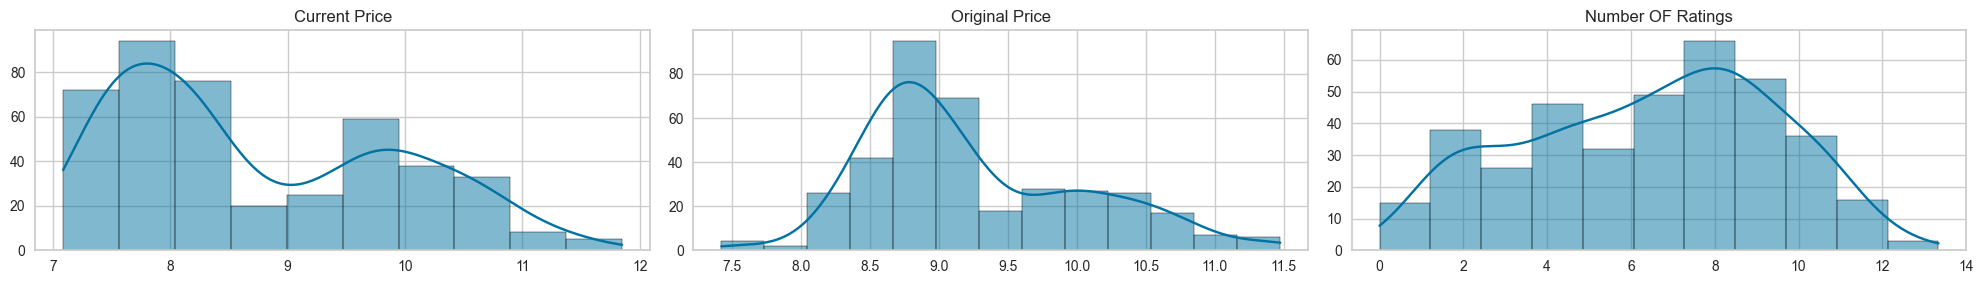

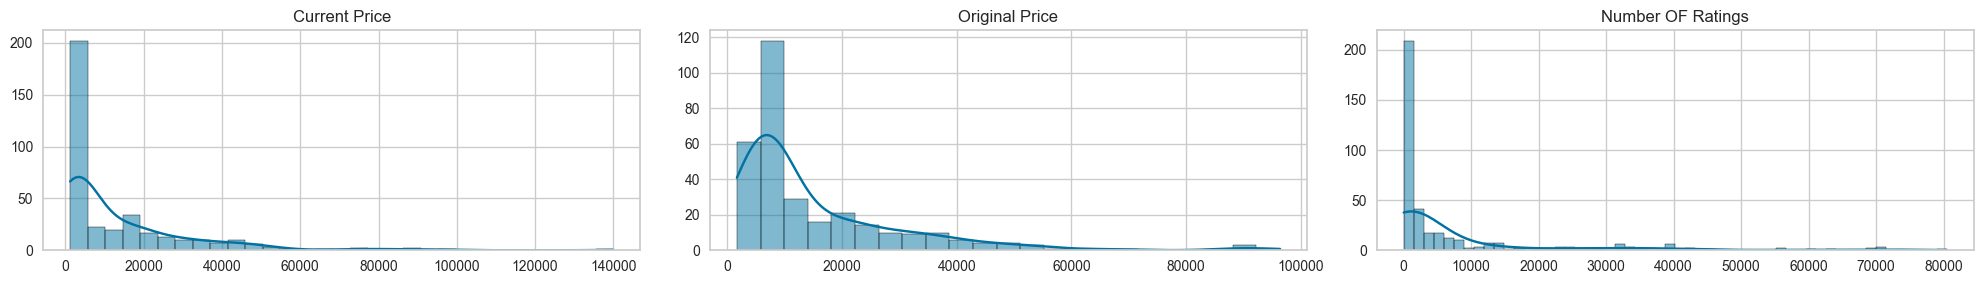

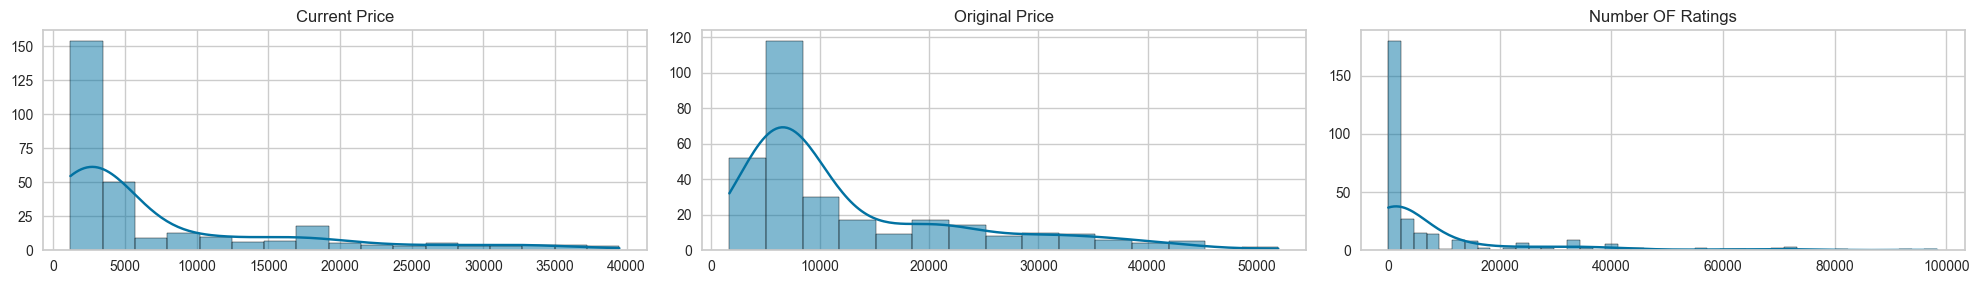

In [296]:
printHistplot(columns, data1)
printHistplot(columns, data_no_outliers)
printHistplot(columns, data2)

Pošto dataset sadrži samo 440 redova, za rešavanje outliera bira se logaritmovanje kako bi se sačuvala veća količina podataka.


Sredjivanje negativnih vrednosti u koloni **Discount Percentage**

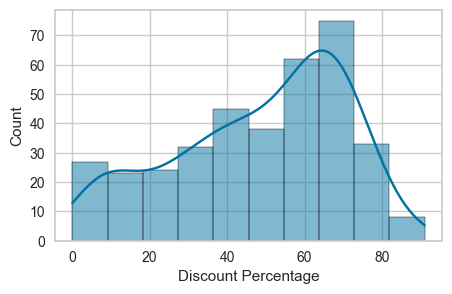

In [297]:
data1["Discount Percentage"] = [np.abs(x) for x in data["Discount Percentage"]]
plt.figure(figsize=(5, 3))
sns.histplot(x="Discount Percentage", data=data1,  kde=True)
plt.show()

### Ispitivanje nedostajućih vrednosti

In [298]:
nan_count = data.isnull().sum().sort_values()

n_miss = {}
for column in data.columns:
    n_miss[column] = {}
    n_miss[column]["Count"] = data[column].isnull().sum()
    n_miss[column]["%"] = round(n_miss[column]["Count"] / data.shape[0] * 100, 2)

pd.DataFrame.from_dict(n_miss).T


Count      %
Brand                  0.0   0.00
Current Price         10.0   2.27
Original Price        73.0  16.59
Discount Percentage   73.0  16.59
Rating                 6.0   1.36
Number OF Ratings     59.0  13.41
Model Name            33.0   7.50
Dial Shape           113.0  25.68
Strap Color          113.0  25.68
Strap Material        66.0  15.00
Touchscreen           37.0   8.41
Battery Life (Days)   32.0   7.27
Bluetooth              6.0   1.36
Display Size          30.0   6.82
Weight               186.0  42.27

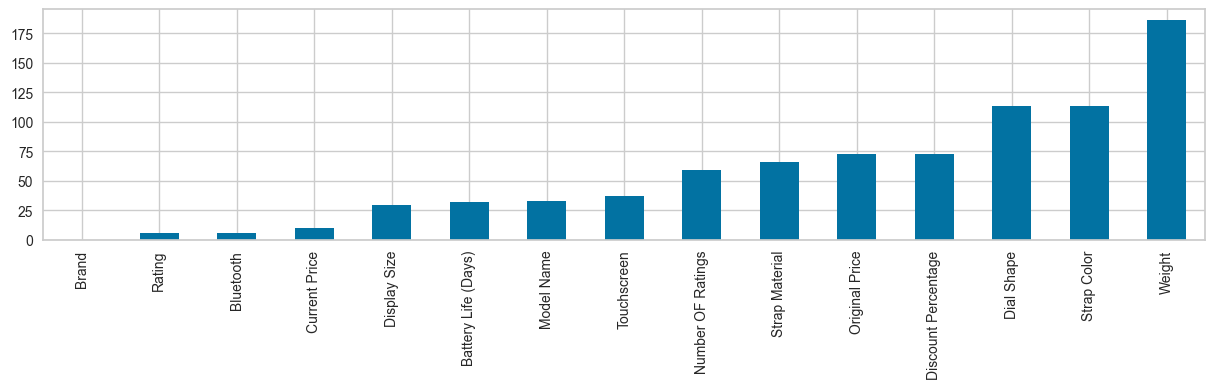

In [299]:
nan_count.plot(kind='bar', figsize=(15, 3))
plt.show()

Pošto kolona **weight** sadrži veliki broj nedostajućih vrednosti, ne uzimamo je u obzir prilikom dalje analize.

In [300]:
data1 = data1.drop(columns=['Weight'])

### Grupisanje kategoričkih podataka

In [301]:
data1["Display Size"]  = data["Display Size"].str.replace(" inches", "").astype(float).round()
data1['Display Size'] = data1['Display Size'].round()
print(data1['Display Size'].round().value_counts())

Display Size
2.0     187
1.0     144
0.0      45
4.0      17
3.0       5
36.0      2
20.0      2
5.0       1
30.0      1
16.0      1
33.0      1
28.0      1
18.0      1
45.0      1
7.0       1
Name: count, dtype: int64


In [302]:
data1['Display Size'] = data1['Display Size'].apply(lambda x: 4 if 3 <= x <= 10 else (28 if x > 10 else x))
print(data1['Display Size'].round().value_counts())

Display Size
2.0     187
1.0     144
0.0      45
4.0      24
28.0     10
Name: count, dtype: int64


In [303]:

# list = [1.7, 1.8, 1.9, 1.3, 1.4, 1.6, 1.5, 1.2 , 0.1]
# uslov = ~data1["Display Size"].isin(list) & data1['Display Size'].notna()

# data1["Display Size"] = np.where(uslov,1,data1["Display Size"])

# print(len(data1["Display Size"]))
# data1["Display Size"].isnull().sum()


In [304]:
# plt.figure(figsize=(5, 5))
# pie = data1["Display Size"].value_counts().plot(kind='pie', labels=data1["Display Size"].unique(), autopct='%0.3f%%')
# pie.figure.legend(loc='right')
# plt.show()

# data1["Display Size"].unique()
# data1["Display Size"].value_counts()

In [305]:
# data1.head()

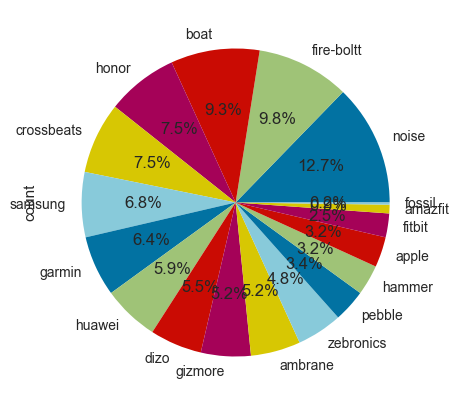

In [306]:
plt.figure(figsize=(5, 5))
pie = data["Brand"].value_counts().plot(kind='pie', labels=data["Brand"].unique(), autopct='%0.1f%%')
plt.show()

Podela brendova u 3 vrste prema populatnosti:  
1) top **15% - 7.5%**
2) middle **6.8% - 5.2%**
3) low **4.8% - 0%** 

In [307]:
scale_mapper = {
    'noise': 'top',
    'fire-boltt': 'top',
    'boat': 'top',
    'honor': 'top',
    'crossbeats': 'top',
    'samsung': 'middle',
    'garmin': 'middle',
    'huawei': 'middle',
    'dizo': 'middle',
    'gizmore': 'middle',
    'ambrane': 'middle',
    'zebronics': 'low',
    'pebble': 'low',
    'hammer': 'low',
    'apple': 'low',
    'fitbit': 'low',
    'amazfit': 'low',
    'fossil': 'low'
    }
data1["Brand"] = data["Brand"].replace(scale_mapper)



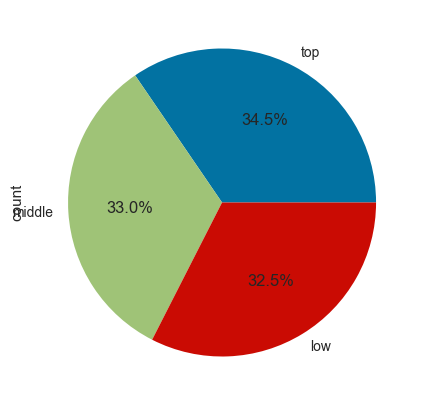

In [308]:
plt.figure(figsize=(5, 5))
pie = data1["Brand"].value_counts().plot(kind='pie', labels=data1["Brand"].unique(), autopct='%0.1f%%')
plt.show()

In [309]:
print(data["Strap Material"].value_counts())

scale_mapper = {
    'Silicon': 'Silicon',
    'Other': 'Other',
    'Rubber': 'Silicon',
    'Fluoroelastomer': 'Silicon',
    'Leather': 'Leather',
    'Metal': 'Metal',  
    'Stainless Steel': 'Metal',
    'Aluminium': 'Metal',
    'Polycarbonate': 'Other',
    'Carbon-Fiber;': 'Other',
    'Plastic': 'Other',
    'Fabric': 'Other',
    'Thermo Plastic Polyurethene': 'Other',
    'Synthetic': 'Other',
    'Nylon': 'Other'
    }
data1["Strap Material"] = data["Strap Material"].replace(scale_mapper)
print("-----------------")
print(data1["Strap Material"].value_counts())


Strap Material
Silicon                        241
Rubber                          32
Other                           21
Stainless Steel                 19
Leather                         17
Fluoroelastomer                 13
Aluminium                       11
Thermo Plastic Polyurethene      8
Fabric                           3
Metal                            2
Plastic                          2
Synthetic                        2
Polycarbonate                    1
Carbon-Fiber;                    1
Nylon                            1
Name: count, dtype: int64
-----------------
Strap Material
Silicon    286
Other       39
Metal       32
Leather     17
Name: count, dtype: int64


In [310]:
print(data['Dial Shape'].value_counts())
scale_mapper = {
    'Circle': 'Circle',
    'Square': 'Rectangle',
    'Rectangle': 'Rectangle',
    'Curved': 'Circle',
    'Contemporary': 'Circle',
    'Oval': 'Circle',
    }
data1["Dial Shape"] = data["Dial Shape"].replace(scale_mapper)
print(data1["Dial Shape"].value_counts())

Dial Shape
Circle          131
Square          101
Rectangle        87
Curved            6
Contemporary      1
Oval              1
Name: count, dtype: int64
Dial Shape
Rectangle    188
Circle       139
Name: count, dtype: int64


In [311]:

scale_mapper = {
    'Midnight': 'Black',
    'Starlight Sport': 'White',
    'Black': 'Black',
    'Pink': 'Pink',
    'Orange Alpine': 'Orange',
    'Green': 'Green',
    'Gold': 'Gold',
    'Blue': 'Blue',
    'Silver': 'Grey',
    'White': 'White',
    'Grey': 'Grey',
    'Red': 'Red',
    'Purple': 'Purple',
    'Brown': 'Brown',
    'Graphite': 'Grey',
    'Beige': 'Brown',
    'Morning Glow': 'Orange',
    'Passion Pink': 'Pink',
    'Beet Juice': 'Purple',
    'Charcoal': 'Grey',
    'White Platinum': 'White',
    'Multicolor': 'Multicolor',
    'Misty Rose': 'Pink',
    'Orange': 'Orange',
    'Burgundy': 'Red',
    'Maroon': 'Red',
    'Pink, Gold': 'Gold',
    'Deep Wine': 'Red',
    'Sea Green': 'Green',
    'Rose Gold': 'Gold'
}
data1["Strap Color"] = data["Strap Color"].replace(scale_mapper)
print('------------------')
print(data1['Strap Color'].value_counts())



------------------
Strap Color
Black         135
Grey           53
Blue           41
Pink           16
Red            16
White          14
Green          14
Brown          14
Gold           12
Orange          6
Purple          4
Multicolor      2
Name: count, dtype: int64


In [312]:

scale_mapper = {
     'Black' : 'Black',
    "Brown" : "Black",
    "Grey" : "Black",
    "Blue" : "Other",
    "Pink" : "Other",
    "Red" : "Other",
    "White" : "Other",
    "Green" : "Other",
    "Gold" : "Other",
    "Orange" : "Other",
    "Purple" : "Other",
    "Multicolor" : "Other"
}

data1["Strap Color"] = data1["Strap Color"].replace(scale_mapper)
print('------------------')
print(data1['Strap Color'].value_counts())

------------------
Strap Color
Black    202
Other    125
Name: count, dtype: int64


In [313]:
data = data1.copy()
data.isna().sum()

Brand                    0
Current Price           10
Original Price          73
Discount Percentage     73
Rating                   6
Number OF Ratings       59
Dial Shape             113
Strap Color            113
Strap Material          66
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
dtype: int64

### Popunjavanje nedostajućih vrednosti


Strategije popunjavanja:
- *mean* za numericke vrednosti
- *mode* za kategoricke vrednosti

In [314]:
columns_mode = ['Dial Shape', 'Strap Color', 'Strap Material', 'Touchscreen', 'Bluetooth', 'Display Size']
data1[columns_mode] = data1[columns_mode].fillna(data1.mode().iloc[0])
data1.isna().sum()

Brand                   0
Current Price          10
Original Price         73
Discount Percentage    73
Rating                  6
Number OF Ratings      59
Dial Shape              0
Strap Color             0
Strap Material          0
Touchscreen             0
Battery Life (Days)    32
Bluetooth               0
Display Size            0
dtype: int64

In [315]:
columns_mean = ['Battery Life (Days)', 'Number OF Ratings', 'Rating', 'Discount Percentage', 'Original Price', 'Current Price']
data1[columns_mean] = data1[columns_mean].fillna(data1[columns_mean].mean())
data1.isna().sum()

Brand                  0
Current Price          0
Original Price         0
Discount Percentage    0
Rating                 0
Number OF Ratings      0
Dial Shape             0
Strap Color            0
Strap Material         0
Touchscreen            0
Battery Life (Days)    0
Bluetooth              0
Display Size           0
dtype: int64

In [316]:
data.head()

Brand  Current Price  Original Price  Discount Percentage  Rating  \
0   top      11.326475       11.406453             7.686318     4.0   
1   top       8.242493        9.740910            77.651627     4.3   
2   top       7.600402        8.985946            74.981227     3.8   
3   top       7.494986        9.903438            91.004550     4.3   
4   top       7.377134        8.516993            68.013603     4.1   

   Number OF Ratings Dial Shape Strap Color Strap Material Touchscreen  \
0           4.174387        NaN         NaN            NaN         NaN   
1           9.942131        NaN         NaN        Silicon         Yes   
2           9.986173        NaN         NaN        Silicon         Yes   
3           9.491300        NaN         NaN        Silicon         Yes   
4           9.539716        NaN         NaN          Other         Yes   

   Battery Life (Days) Bluetooth  Display Size  
0                  8.0       Yes           NaN  
1                  3.5       Yes           2.0  
2                  8.0       Yes           2.0  
3                  3.5       Yes           2.0  
4                  8.0       Yes           2.0

### Prebacivanje kategorickih u numericke vrednosti

In [317]:
scale_mapper = {
    'Yes': True,
    'No': False }

data1["Bluetooth"] = data["Bluetooth"].replace(scale_mapper)
data1["Touchscreen"] = data["Touchscreen"].replace(scale_mapper)

In [318]:
data1.rename(columns={'Brand': 'B', 'Strap Color':'S_C', 'Strap Material':'S_M' }, inplace=True)
data1 = pd.get_dummies(data=data1, columns=['B', "S_C", "S_M"])
data1 = pd.get_dummies(data = data1, columns= ['Dial Shape'], drop_first=True)
data1

Current Price  Original Price  Discount Percentage    Rating  \
0        11.326475       11.406453             7.686318  4.000000   
1         8.242493        9.740910            77.651627  4.300000   
2         7.600402        8.985946            74.981227  3.800000   
3         7.494986        9.903438            91.004550  4.300000   
4         7.377134        8.516993            68.013603  4.100000   
..             ...             ...                  ...       ...   
445       8.699348        9.104869            33.337037  2.500000   
446       8.216088        9.210240            62.996300  4.032949   
447       8.699348        9.104869            33.337037  2.500000   
448       8.070906        8.987072            59.994999  4.032949   
449       8.006368        8.987072            62.495312  4.032949   

     Number OF Ratings Touchscreen  Battery Life (Days) Bluetooth  \
0             4.174387         NaN                  8.0      True   
1             9.942131        True                  3.5      True   
2             9.986173        True                  8.0      True   
3             9.491300        True                  3.5      True   
4             9.539716        True                  8.0      True   
..                 ...         ...                  ...       ...   
445           6.445428        True                 22.0      True   
446           6.445428        True                  8.0      True   
447           6.445428        True                 22.0      True   
448           6.445428        True                 22.0      True   
449           6.445428        True                 22.0      True   

     Display Size  B_low  B_middle  B_top  S_C_Black  S_C_Other  S_M_Leather  \
0             2.0  False     False   True       True      False        False   
1             2.0  False     False   True       True      False        False   
2             2.0  False     False   True       True      False        False   
3             2.0  False     False   True       True      False        False   
4             2.0  False     False   True       True      False        False   
..            ...    ...       ...    ...        ...        ...          ...   
445           1.0  False     False   True       True      False        False   
446           0.0  False     False   True       True      False        False   
447           1.0  False     False   True      False       True        False   
448           0.0  False     False   True      False       True        False   
449           0.0  False     False   True       True      False        False   

     S_M_Metal  S_M_Other  S_M_Silicon  Dial Shape_Rectangle  
0        False      False         True                  True  
1        False      False         True                  True  
2        False      False         True                  True  
3        False      False         True                  True  
4        False       True        False                  True  
..         ...        ...          ...                   ...  
445      False      False         True                 False  
446      False      False         True                  True  
447      False      False         True                 False  
448      False      False         True                  True  
449      False      False         True                  True  

[440 rows x 19 columns]

In [319]:
#data1 = data1.drop(columns=['Weight', "Strap Color", "Dial Shape", "Model Name", "Strap Material" ])
data1 = data1.drop(columns=["Model Name" ])

KeyError: "['Model Name'] not found in axis"

In [ ]:
data1.head()
data = data1.copy()

## Data corelation

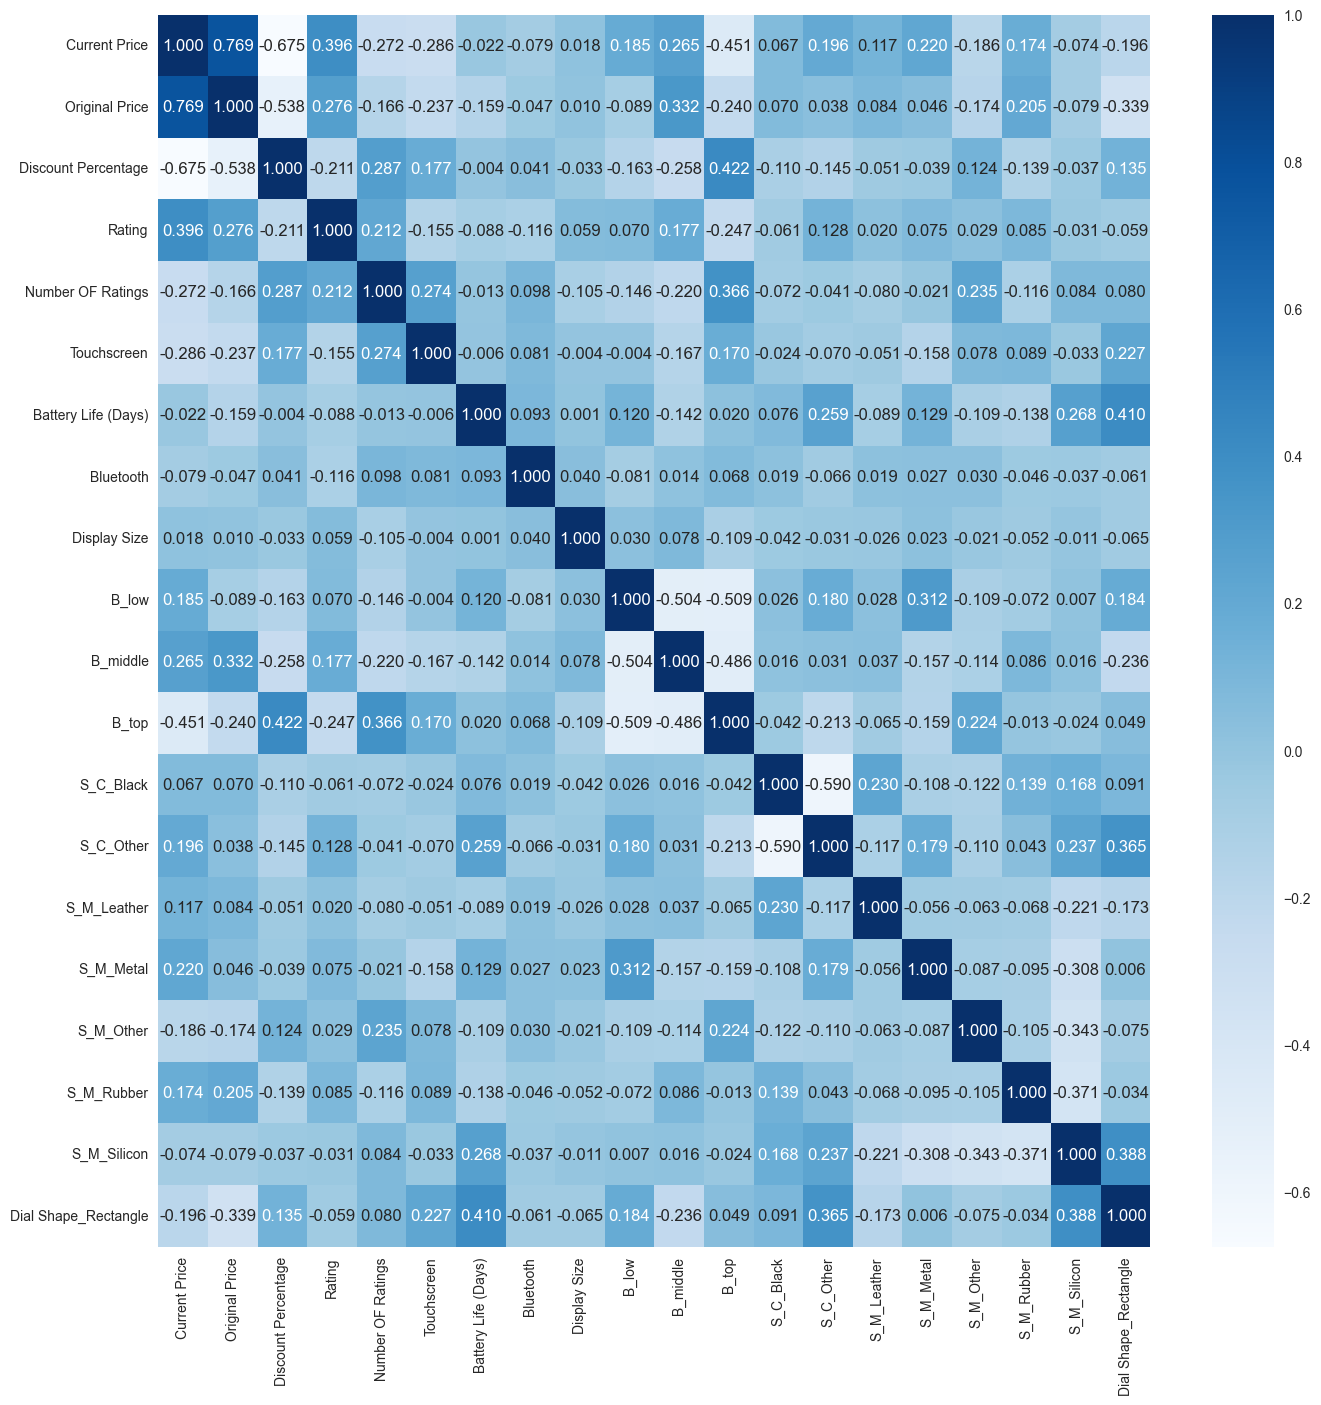

In [ ]:
df_corr = data1.corr()
plt.figure(figsize = (16,16))
sns.heatmap(data=df_corr, annot=True,cmap='Blues',fmt='.3f')
plt.show()

## Standardize data

In [ ]:
# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(data1)


The Silhouette score is computed by averaging the silhouette coefficient for each sample, computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering.

Calinski and Harabasz score is defined as ratio of the sum of between-cluster dispersion and of within-cluster dispersion.

Davies-Bouldin score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score. The minimum score is zero, with lower values indicating better clustering.

In [ ]:
result_df = pd.DataFrame({
                    "": ["calinski_harabasz", "Silhouette", "Davies-Bouldin"], 
                    "KMeans": [2.0,3.0,4.0],
                   "MeanShift": [0.0,0.0,0.0],
                   "DBSCAN": [0.0,0.0,0.0],
                   "Agglomerative": [0.0,0.0,0.0], "Gaussian Mixture": [0.0,0.0,0.0],
                   "Spectar clustering": [0.0,0.0,0.0],
                   "PCA KMeans":  [0.0,0.0,0.0],
                    "PCA MeanShift": [0.0,0.0,0.0],
                   "PCA DBSCAN": [0.0,0.0,0.0],
                   "PCA Agglomerative": [0.0,0.0,0.0],  "PCA Gaussian Mixture": [0.0,0.0,0.0],
"PCA Spectar clustering": [0.0,0.0,0.0],
                   "PCA 4 KMeans":  [0.0,0.0,0.0],
                    "PCA 4 MeanShift": [0.0,0.0,0.0],
                   "PCA 4 DBSCAN": [0.0,0.0,0.0],
                   "PCA 4 Agglomerative": [0.0,0.0,0.0],  "PCA 4 Gaussian Mixture": [0.0,0.0,0.0],
                   "PCA 4 Spectar clustering": [0.0,0.0,0.0],
                   "Reduced PCA Agglomerative":  [0.0,0.0,0.0],
                   "Reduced PCA KMeans":  [0.0,0.0,0.0],

                })

pommocne funkcije

In [ ]:
def printResult(y_value, X_value, claster_center):
    unique_labels = np.unique(y_value)
    for label in zip(unique_labels):
        plt.scatter(X_value[y_value == label][:, 0], X_value[y_value == label][:, 1], s=25, label=f'Cluster {label}', cmap='viridis')
    if(claster_center is not None):
        plt.scatter(claster_center[:, 0], claster_center[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10, cmap='viridis')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

def printCenters(claster_center):
    plt.figure(figsize=(20, 15))

    for i in range(len(claster_center)):
        plt.subplot(len(claster_center), 1, i + 1)
        plt.bar(range(features_std.shape[1]), claster_center[i], tick_label=[f'{j[0:8]}' for j in data1.columns])
        plt.title(f'Cluster {i + 1} - Feature Importance')

    plt.tight_layout()
    plt.show()

def print3D(Y, X):
    pca = PCA(n_components=3)
    PCA_components = pca.fit_transform(X)
    principalComponents = pd.DataFrame(PCA_components, columns=(["f1","f2", "f3"]))

    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.scatter3D(principalComponents["f1"], principalComponents["f2"], principalComponents["f3"], c=Y, cmap='viridis')
    ax.set_title("3D scatterplot of size-reduced data")

    plt.show()

def getScore (y_value, X_value, alg_name) : 
    calinski = calinski_harabasz_score(X_value, y_value)
    silhouette = silhouette_score(X_value, y_value)
    davies = davies_bouldin_score(X_value, y_value)

    result_df[alg_name].loc[0] = calinski
    result_df[alg_name].loc[1] = silhouette
    result_df[alg_name].loc[2] = davies
    
    print("calinski_harabasz_score", calinski)
    print("Silhouette score: ", silhouette)
    print("Davies-Bouldin score: ", davies)

### Dendogram

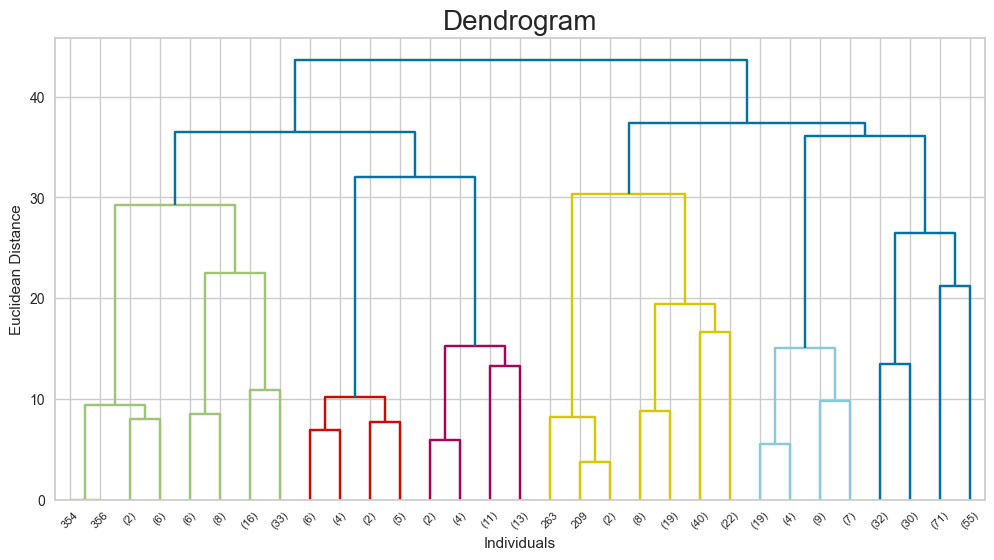

In [ ]:
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(features_std, method='ward'), truncate_mode='level', p =4)
plt.title('Dendrogram', fontsize=20)
plt.xlabel('Individuals')
plt.ylabel('Euclidean Distance')
plt.show()

## Primena algoritama


### Standard Data

#### KMeans

##### Elbow Method

Elbow Method to determine the number of clusters to be formed:


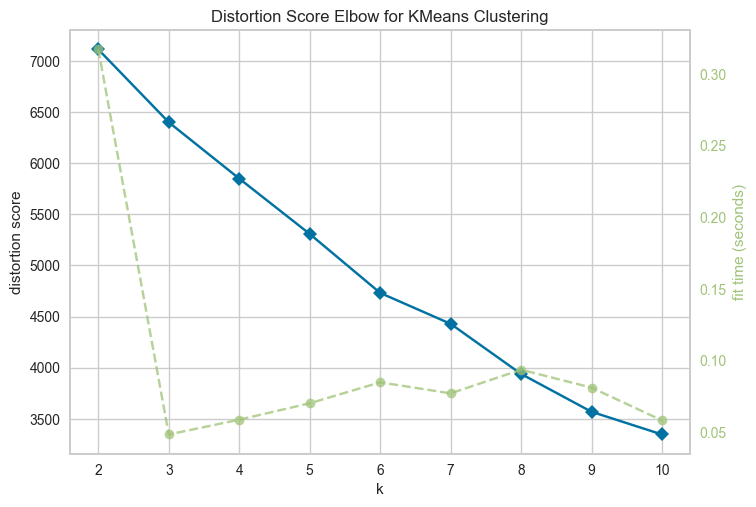

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(features_std)
Elbow_M.show()


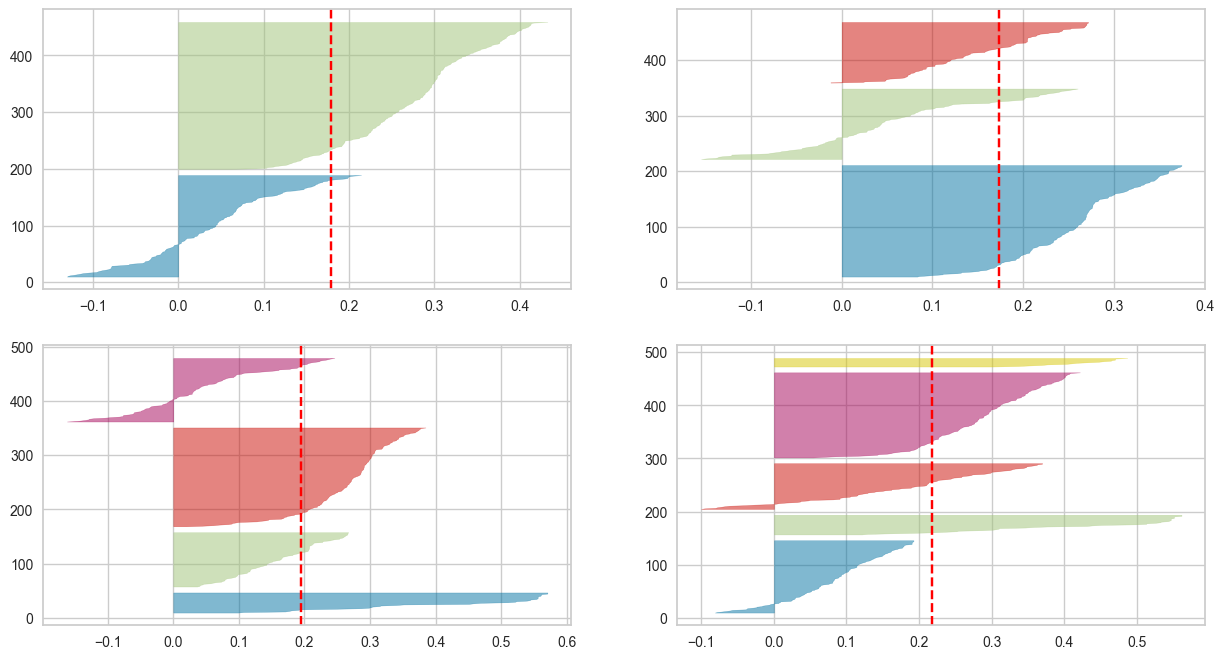

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]: 
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
 
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(features_std)

calinski_harabasz_score 62.97593677839278
Silhouette score:  0.1896528915534517
Davies-Bouldin score:  1.7459873510468604


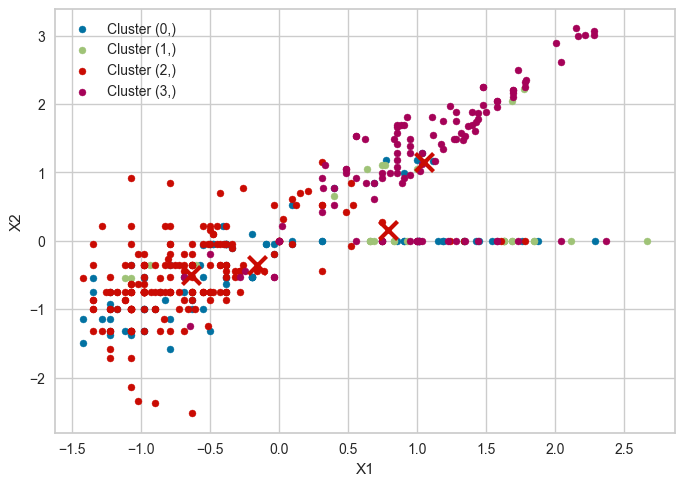

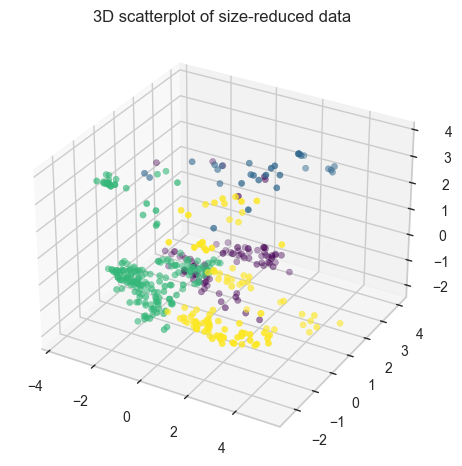

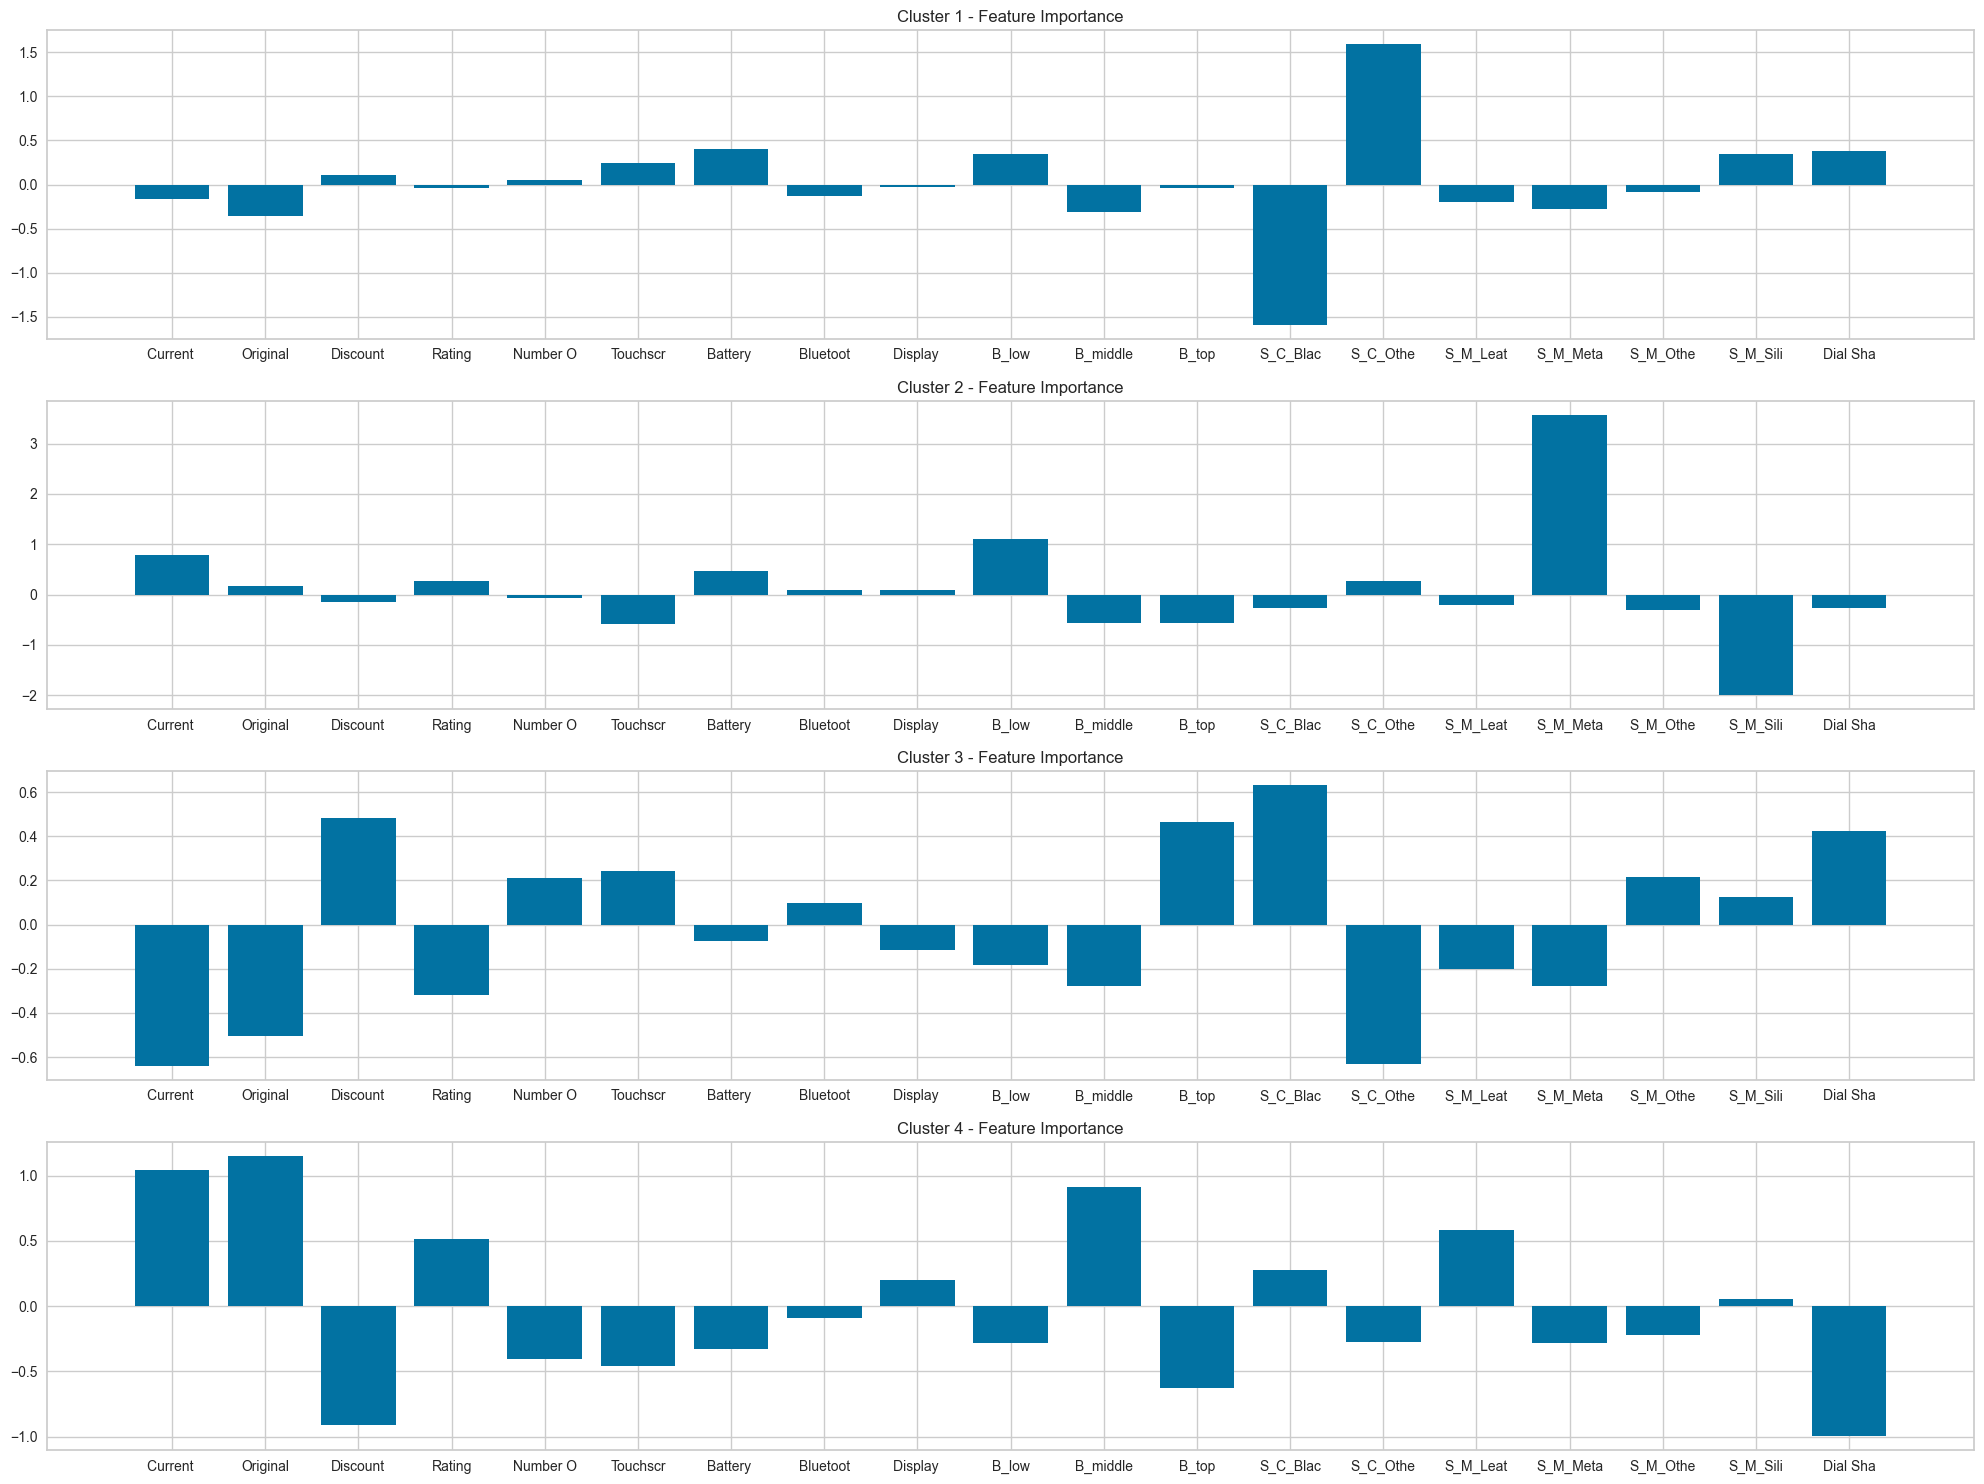

In [ ]:
kmeans = KMeans(n_clusters=4, n_init=50, init='k-means++', max_iter=500).fit(features_std)

pred_kmeans = kmeans.predict(features_std)

claster_center_kmeans = kmeans.cluster_centers_

getScore(pred_kmeans, features_std, "KMeans")
printResult(pred_kmeans, features_std, claster_center_kmeans)
print3D(pred_kmeans, features_std)
printCenters(claster_center_kmeans)


#### MeanShift


calinski_harabasz_score 20.025271481401468
Silhouette score:  0.3050682121629338
Davies-Bouldin score:  0.8127939993697612


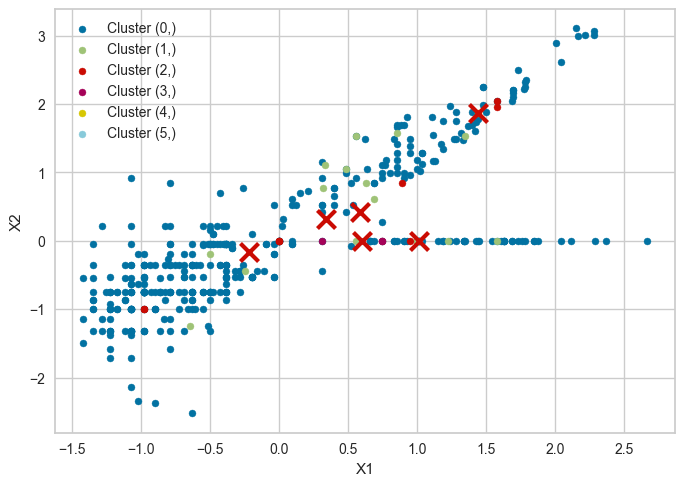

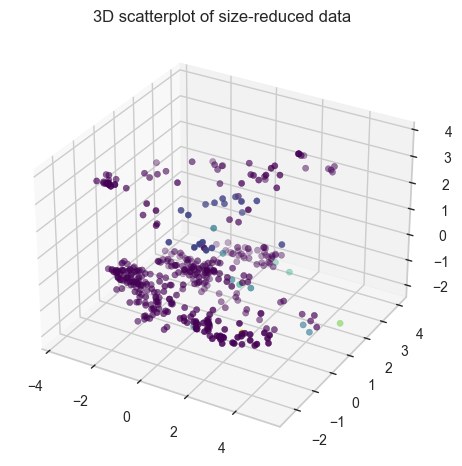

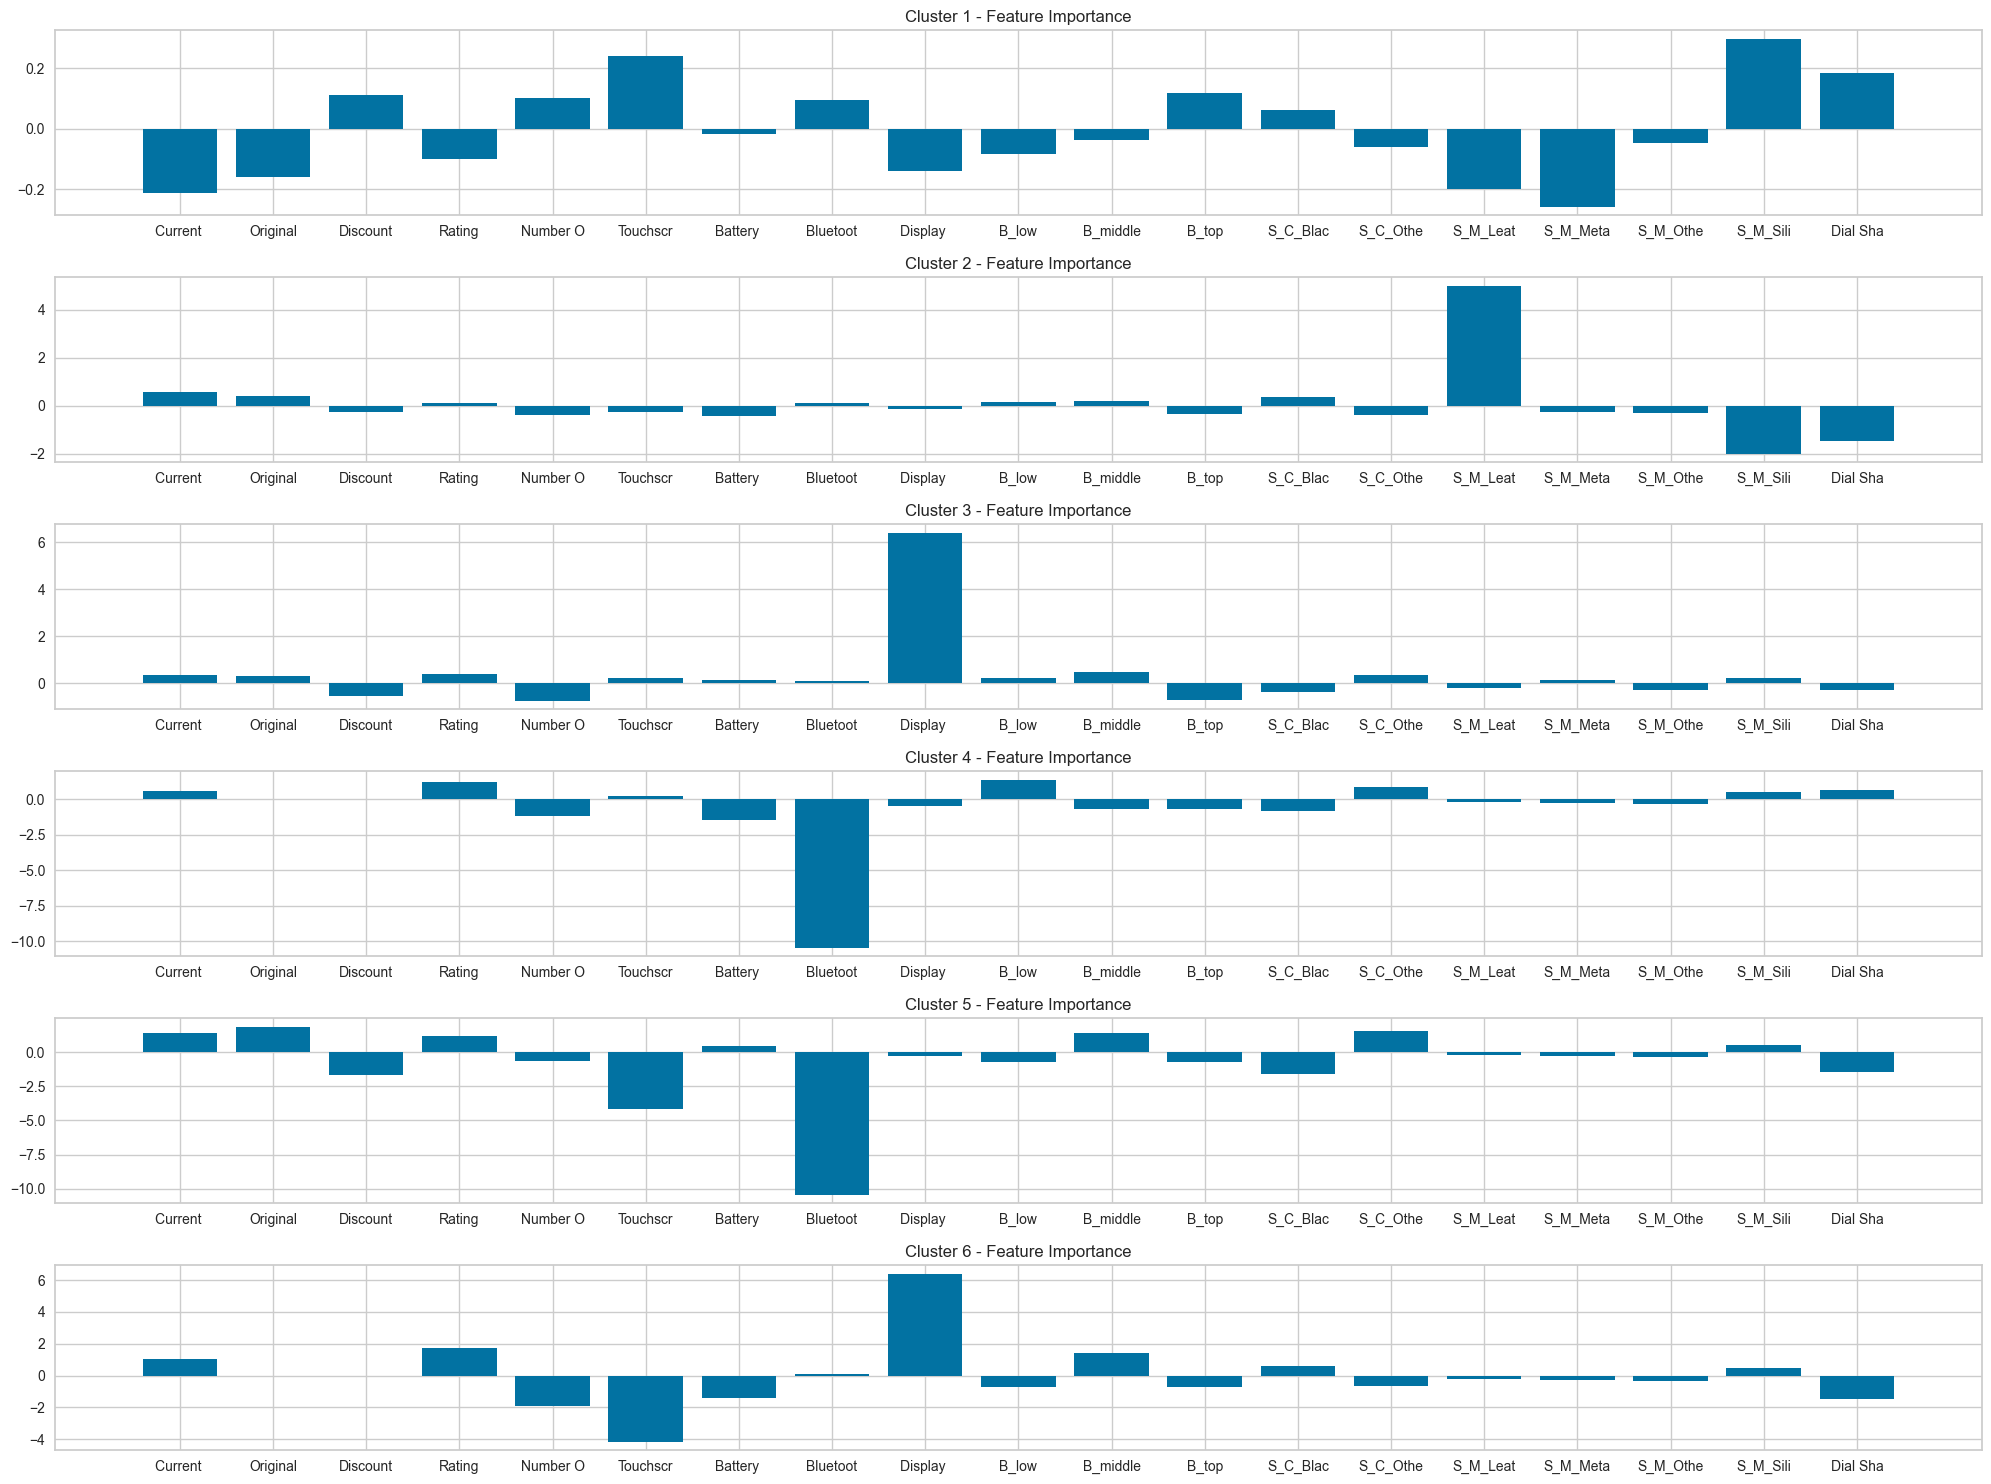

In [ ]:
mean_shift = MeanShift().fit(features_std)

pred_means = mean_shift.predict(features_std)

claster_center_mean_s = mean_shift.cluster_centers_

getScore(pred_means, features_std, "MeanShift")
printResult(pred_means, features_std, claster_center_mean_s)
print3D(pred_means, features_std)
printCenters(claster_center_mean_s)

#### DBSCAN

calinski_harabasz_score 8.79577414621953
Silhouette score:  -0.1289079658807997
Davies-Bouldin score:  1.007135139376119


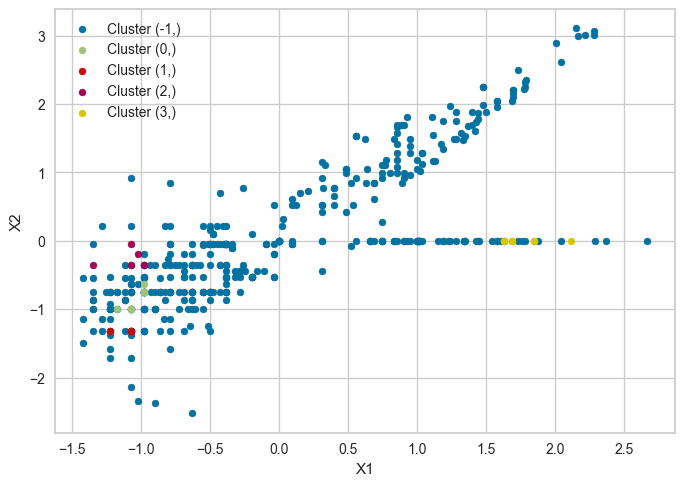

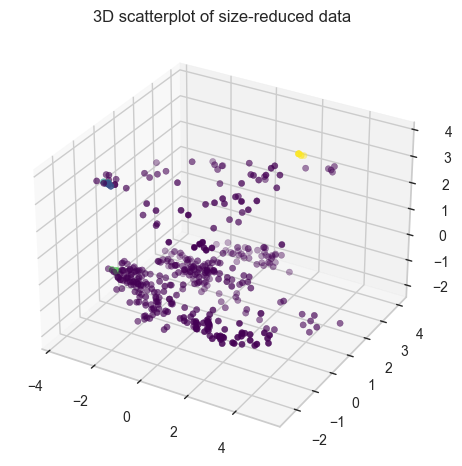

In [ ]:
dbscan_optimal = DBSCAN()
pred_dbscan = dbscan_optimal.fit_predict(features_std)

getScore(pred_dbscan, features_std, "DBSCAN")
printResult(pred_dbscan, features_std, None)
print3D(pred_dbscan, features_std)

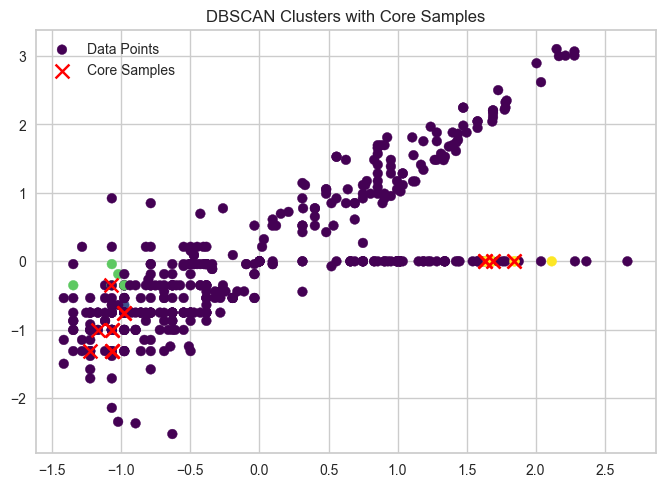

In [ ]:
core_samples_mask = np.zeros_like(pred_dbscan, dtype=bool)
core_samples_mask[dbscan_optimal.core_sample_indices_] = True

core_samples = features_std[core_samples_mask]

plt.scatter(features_std[:, 0], features_std[:, 1], c=pred_dbscan, cmap='viridis', marker='o', label='Data Points')
plt.scatter(core_samples[:, 0], core_samples[:, 1], c='red', marker='x', s=100, label='Core Samples')
plt.title('DBSCAN Clusters with Core Samples')
plt.legend()
plt.show()

#### Agglomerative clustering

Elbow Method to determine the number of clusters to be formed:


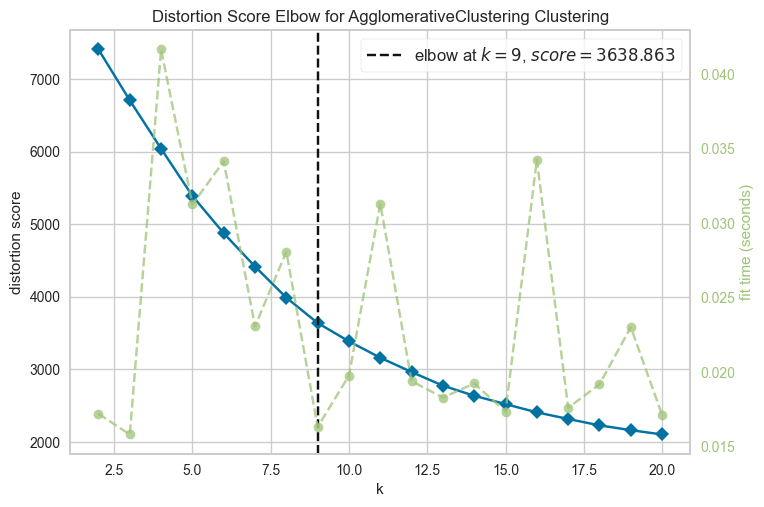

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=20)
Elbow_M.fit(features_std)
Elbow_M.show()

calinski_harabasz_score 71.58475194697427
Silhouette score:  0.2877190654015392
Davies-Bouldin score:  1.1229931597467322


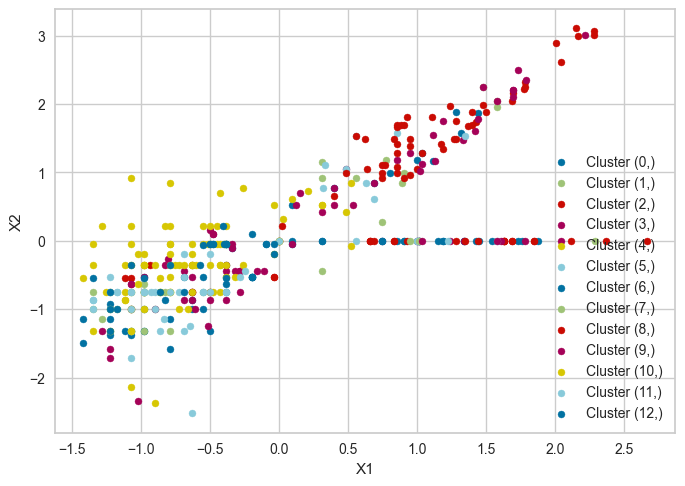

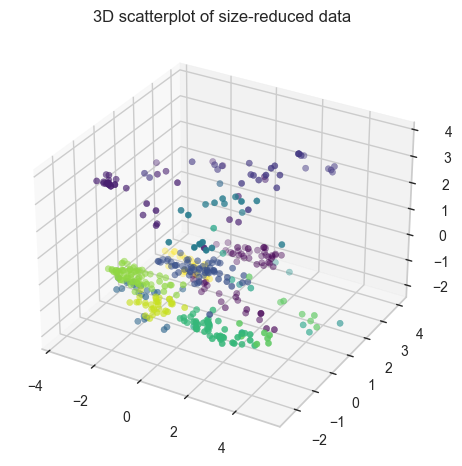

In [ ]:
ac_model = AgglomerativeClustering(n_clusters=13, compute_distances=True)
ac_pred = ac_model.fit_predict(features_std)

getScore(ac_pred, features_std, "Agglomerative")
printResult(ac_pred, features_std, None)
print3D(ac_pred, features_std)


In [ ]:
data.columns

Index(['Current Price', 'Original Price', 'Discount Percentage', 'Rating',
       'Number OF Ratings', 'Touchscreen', 'Battery Life (Days)', 'Bluetooth',
       'Display Size', 'B_low', 'B_middle', 'B_top', 'S_C_Black', 'S_C_Other',
       'S_M_Leather', 'S_M_Metal', 'S_M_Other', 'S_M_Silicon',
       'Dial Shape_Rectangle'],
      dtype='object')

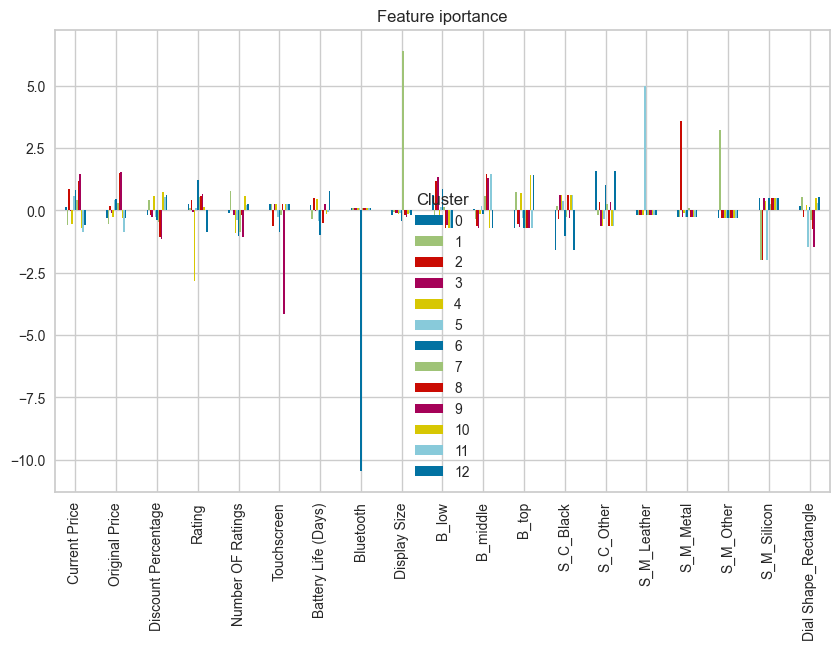

In [ ]:

df = pd.DataFrame(features_std, columns=data1.columns)
df['Cluster'] = ac_pred

# Izračun srednjih vrijednosti po klasterima
cluster_means = df.groupby('Cluster').mean()

# Vizualizacija srednjih vrijednosti po klasterima
fig, ax = plt.subplots(figsize=(10, 6))
cluster_means.T.plot(kind='bar', ax=ax)
plt.title('Feature iportance')
plt.show()

#### Gaussian mixture

3
4
calinski_harabasz_score 48.24269236237516
Silhouette score:  0.13656478407981634
Davies-Bouldin score:  2.4719780708065224


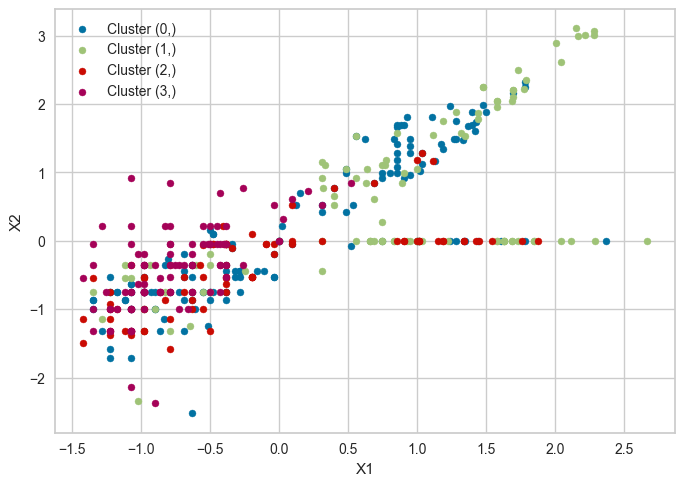

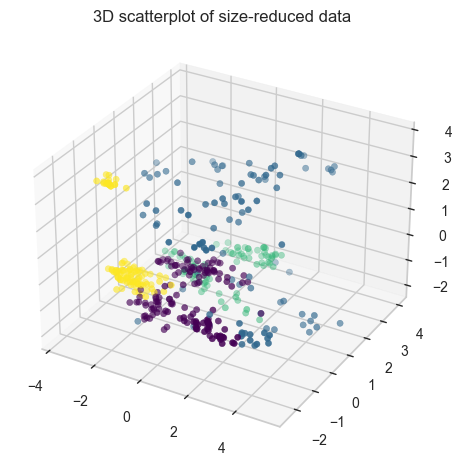

In [ ]:

best_gmm = None
best_gmm_labels = None
n_components_range = range(3, 5)  

X_gaus = features_std

for k in n_components_range:
    gm_model = GaussianMixture(n_components=k, covariance_type='spherical')
    gm_model.fit(features_std)
    gm_labels = gm_model.predict(features_std)

    if best_gmm is None or gm_model.bic(features_std) < best_gmm.bic(features_std):
        best_gmm = gm_model
        best_gmm_labels = gm_labels
        print(k)


getScore(best_gmm_labels, features_std, "Gaussian Mixture")
printResult(best_gmm_labels, features_std, None)
print3D(best_gmm_labels, features_std)



#### Spectar clustering


calinski_harabasz_score 31.125467388447802
Silhouette score:  0.09485526825192837
Davies-Bouldin score:  2.3111906590592546


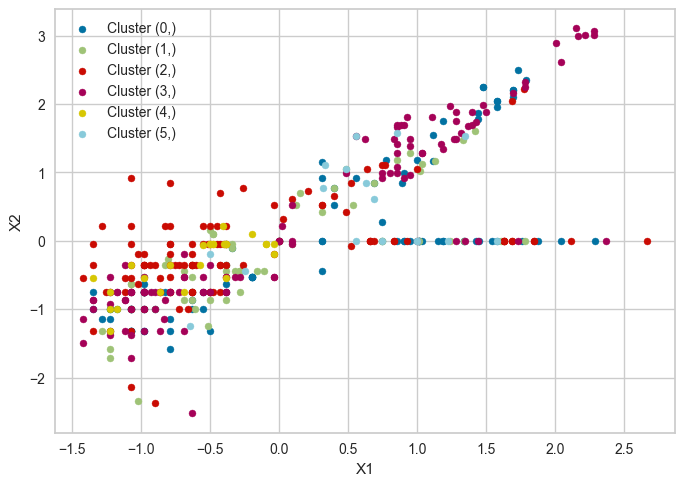

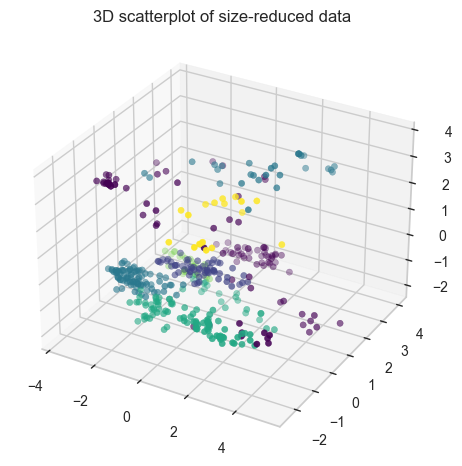

In [ ]:

n_clusters = 6 

spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
labels = spectral.fit_predict(features_std)

getScore(labels, features_std, "Spectar clustering")
printResult(labels, features_std, None)
print3D(labels, features_std)


### Data reduction with PCA

In [ ]:
pca = PCA(n_components=3, random_state=80)
pca.fit(features_std)
data_pca = pd.DataFrame(pca.transform(features_std), columns=(["f1","f2", "f3"]))
pca.explained_variance_ratio_.cumsum()


array([0.20018411, 0.32716134, 0.43467157])

#### KMeans

Elbow Method to determine the number of clusters to be formed:


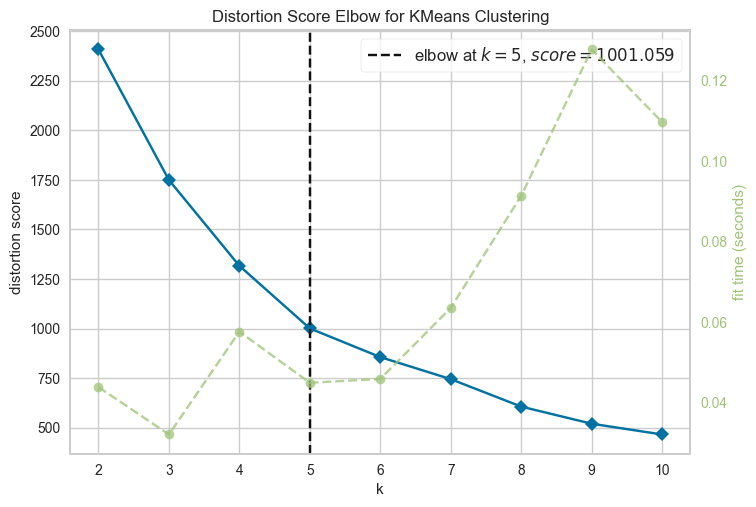

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_pca)
Elbow_M.show()

calinski_harabasz_score 255.73994999883058
Silhouette score:  0.4034176851704336
Davies-Bouldin score:  0.9069691155361357


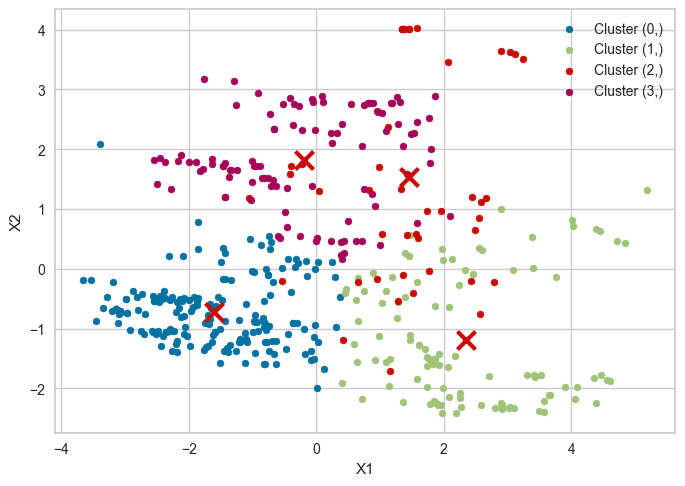

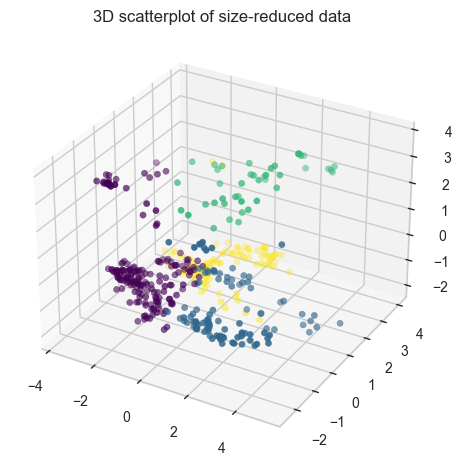

In [ ]:
kmeans_pca = KMeans(n_clusters=4, n_init=50, init='k-means++', max_iter=500).fit(data_pca)
pred_kmeans_pca = kmeans_pca.predict(data_pca)
claster_center_kmeans_pca = kmeans_pca.cluster_centers_

labels = kmeans.labels_

getScore(pred_kmeans_pca, data_pca, "PCA KMeans")
printResult(pred_kmeans_pca, data_pca.values,claster_center_kmeans_pca )
print3D(pred_kmeans_pca, data_pca)


#### DBSCAN

calinski_harabasz_score 96.81701004264893
Silhouette score:  0.1851376813325703
Davies-Bouldin score:  1.2854366678804472


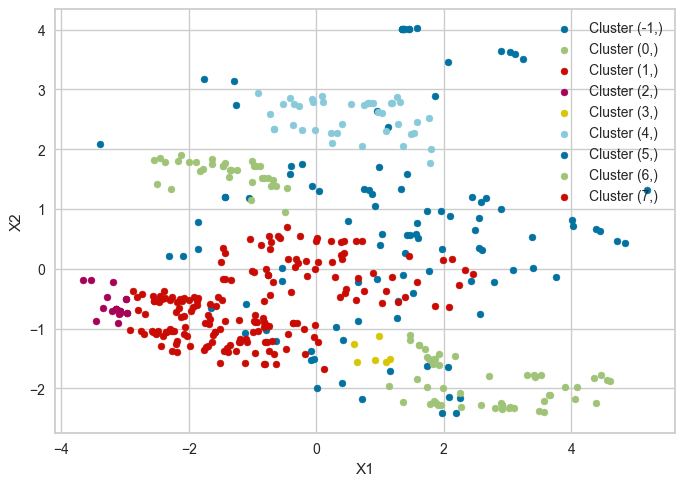

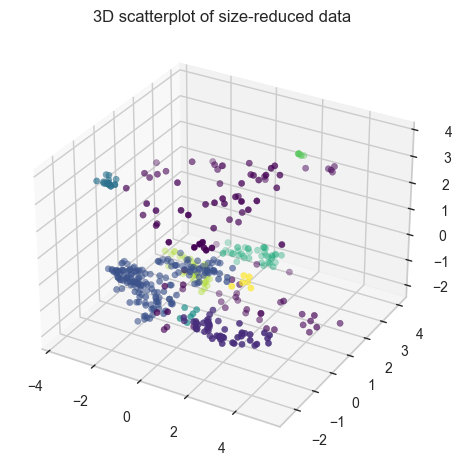

In [ ]:
dbscan_optimal_pca = DBSCAN()
pred_dbscan_pca = dbscan_optimal_pca.fit_predict(data_pca)

getScore(pred_dbscan_pca, data_pca, "PCA DBSCAN")
printResult(pred_dbscan_pca, data_pca.values, None )
print3D(pred_dbscan_pca, data_pca)

#### Agglomerative

Elbow Method to determine the number of clusters to be formed:


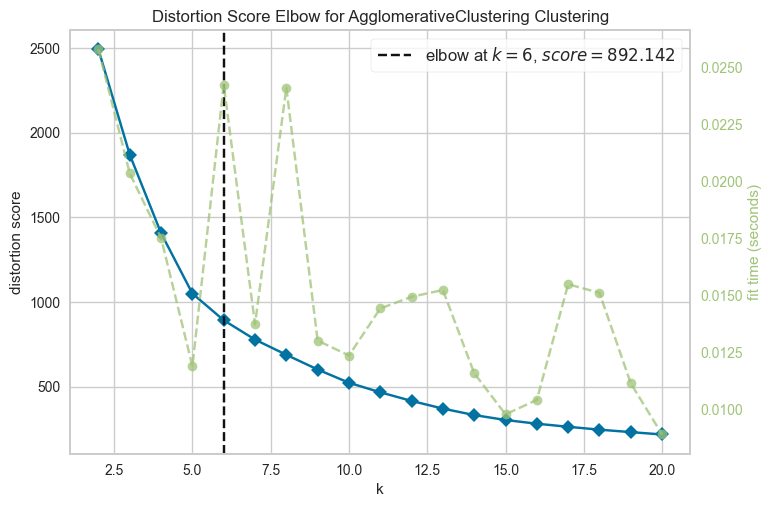

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=20)
Elbow_M.fit(data_pca)
Elbow_M.show()


calinski_harabasz_score 266.7519774502514
Silhouette score:  0.4485956907755177
Davies-Bouldin score:  0.7773011729832054


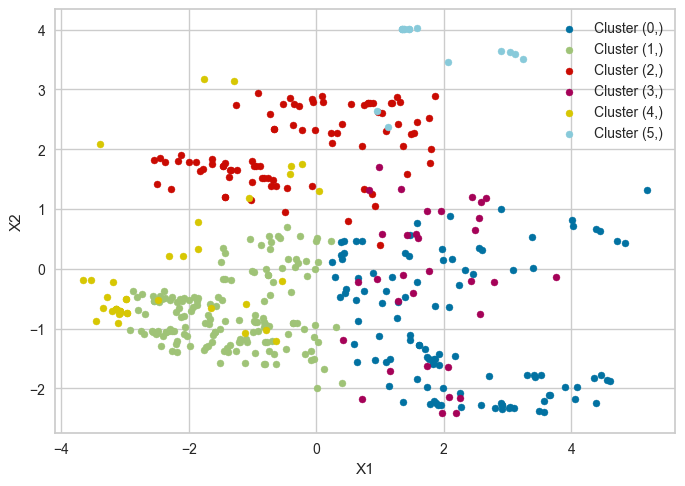

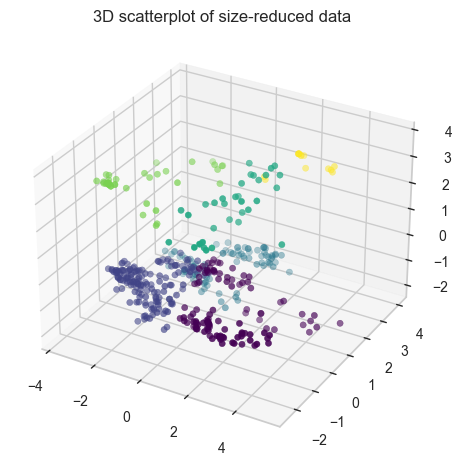

In [ ]:
ac_model_pca = AgglomerativeClustering(n_clusters=6, compute_distances=True)
ac_pred_pca = ac_model_pca.fit_predict(data_pca)

getScore(ac_pred_pca, data_pca, "PCA Agglomerative")
printResult(ac_pred_pca, data_pca.values, None )
print3D(ac_pred_pca, data_pca)


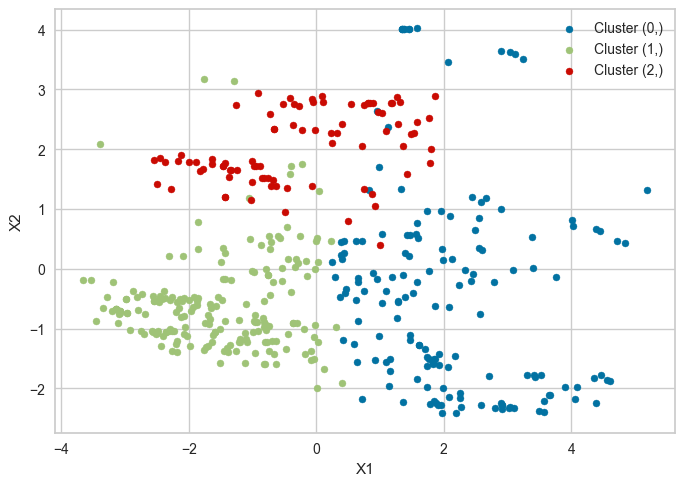

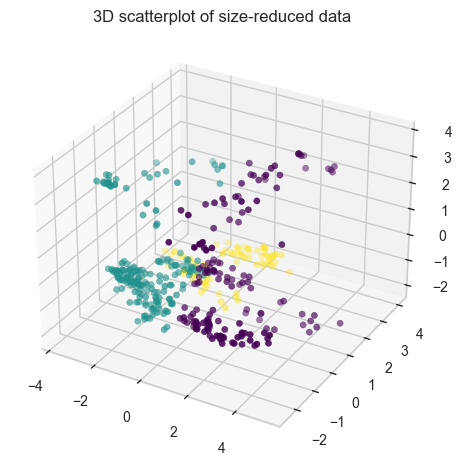

In [ ]:
ac_model_pca = AgglomerativeClustering(n_clusters=3, compute_distances=True)
ac_pred_pca = ac_model_pca.fit_predict(data_pca)

printResult(ac_pred_pca, data_pca.values, None )
print3D(ac_pred_pca, data_pca)

#### Gaussian mixture

calinski_harabasz_score 178.1298161594946
Silhouette score:  0.3459760616744563
Davies-Bouldin score:  1.000362850312002


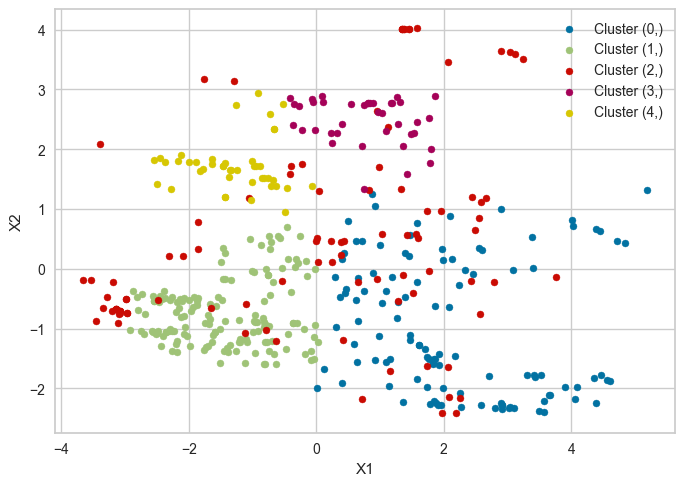

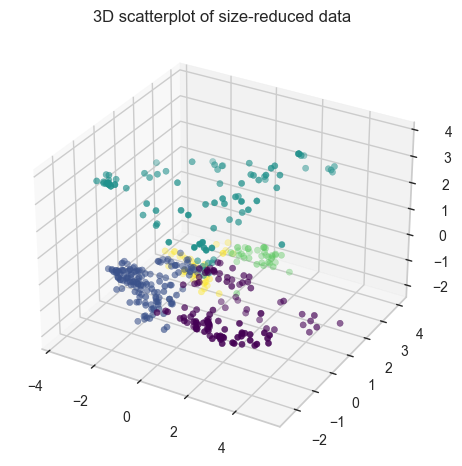

In [ ]:

gm_model = GaussianMixture(n_components=5, covariance_type='spherical')
gm_model.fit(data_pca)
gm_labels = gm_model.predict(data_pca)

getScore(gm_labels, data_pca, "PCA Gaussian Mixture")
printResult(gm_labels, data_pca.values, None)
print3D(gm_labels, data_pca)


#### Spectral Clustering

calinski_harabasz_score 23.5941309073993
Silhouette score:  -0.006036776530816185
Davies-Bouldin score:  4.292248245523233


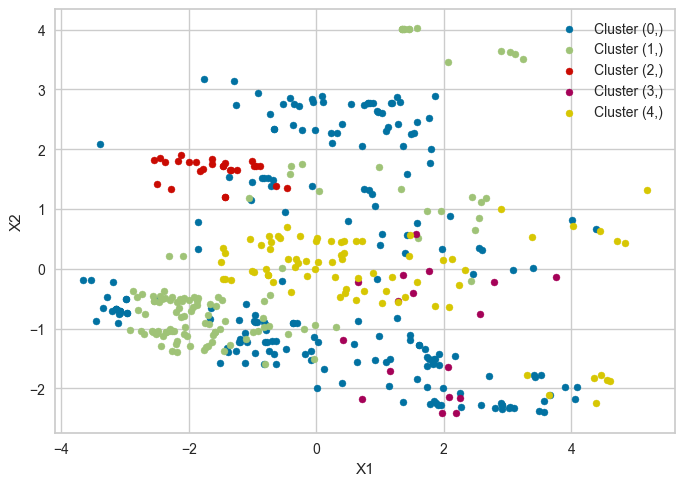

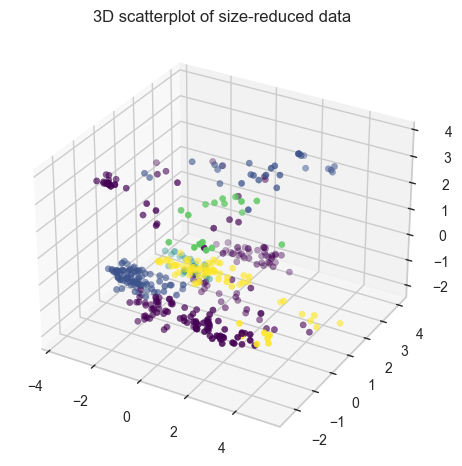

In [ ]:

n_clusters = 5 

spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
labels = spectral.fit_predict(features_std)

getScore(labels, data_pca, "PCA Spectar clustering")
printResult(labels, data_pca.values, None)
print3D(labels, data_pca)

### PCA sa 4 komponente

In [ ]:
pca4 = PCA(n_components=4, random_state=80)
pca4.fit(features_std)
data_pca4 = pd.DataFrame(pca4.transform(features_std), columns=(["f1","f2", "f3", "f4"]))
pca4.explained_variance_ratio_.cumsum()

array([0.20018411, 0.32716134, 0.43467157, 0.5147885 ])

#### KMeans

calinski_harabasz_score 212.61613965110277
Silhouette score:  0.4102654582386284
Davies-Bouldin score:  0.9034222060386645


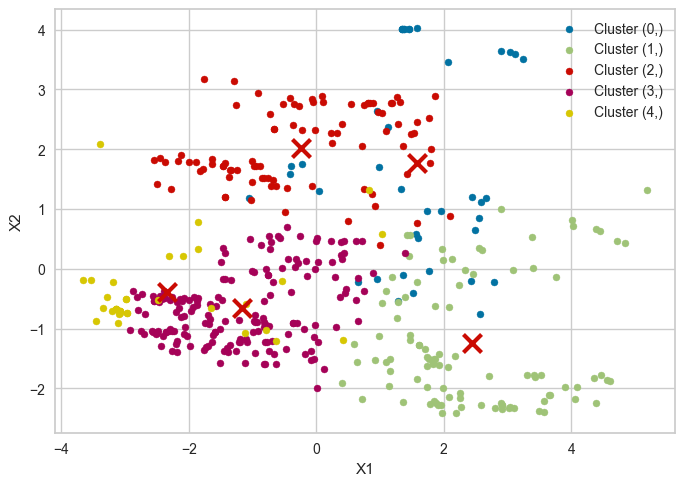

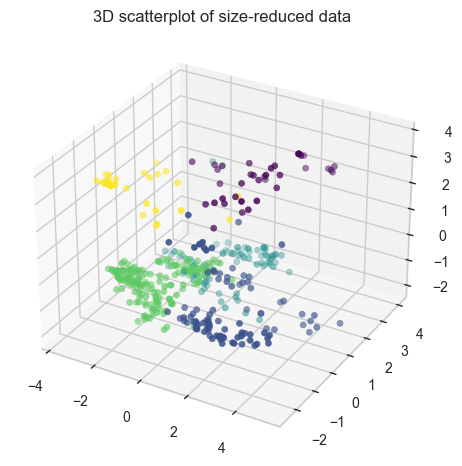

In [ ]:
kmeans_pca4 = KMeans(n_clusters=5, n_init=50, init='k-means++', max_iter=500).fit(data_pca4)
pred_kmeans_pca4 = kmeans_pca4.predict(data_pca4)
claster_center_kmeans_pca4 = kmeans_pca4.cluster_centers_

labels = kmeans.labels_

getScore(pred_kmeans_pca4, data_pca4, "PCA 4 KMeans")
printResult(pred_kmeans_pca4, data_pca4.values,claster_center_kmeans_pca4 )
print3D(pred_kmeans_pca4, data_pca4)


#### DBSCAN

calinski_harabasz_score 28.44411829608144
Silhouette score:  0.0031397922865090246
Davies-Bouldin score:  1.583873696238508


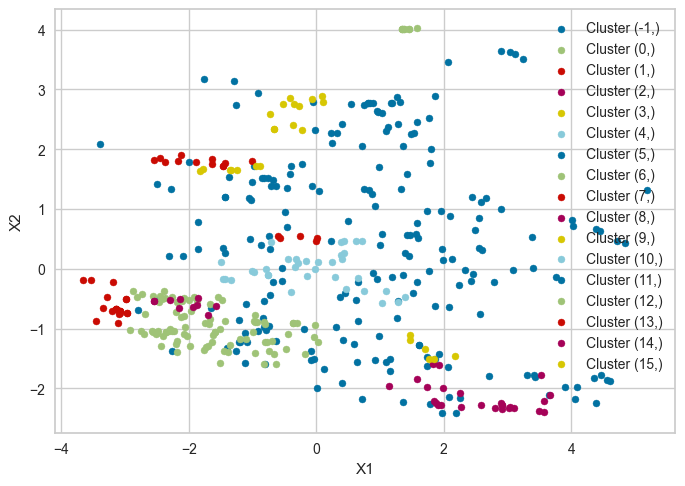

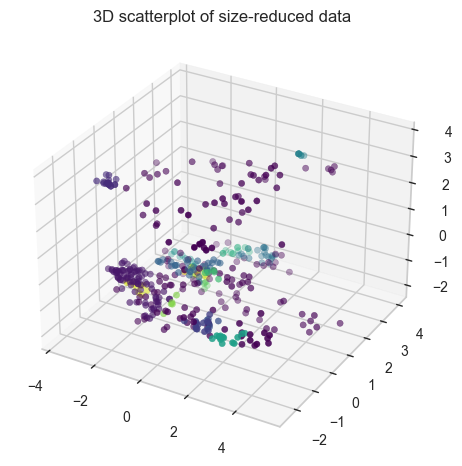

In [ ]:
dbscan_optimal_pca4 = DBSCAN()
pred_dbscan_pca4 = dbscan_optimal_pca4.fit_predict(data_pca4)

getScore(pred_dbscan_pca4, data_pca4, "PCA 4 DBSCAN")
printResult(pred_dbscan_pca4, data_pca4.values, None )
print3D(pred_dbscan_pca4, data_pca4)

#### Agglomerative

calinski_harabasz_score 191.77773586705092
Silhouette score:  0.3865332706585392
Davies-Bouldin score:  0.9764315695209356


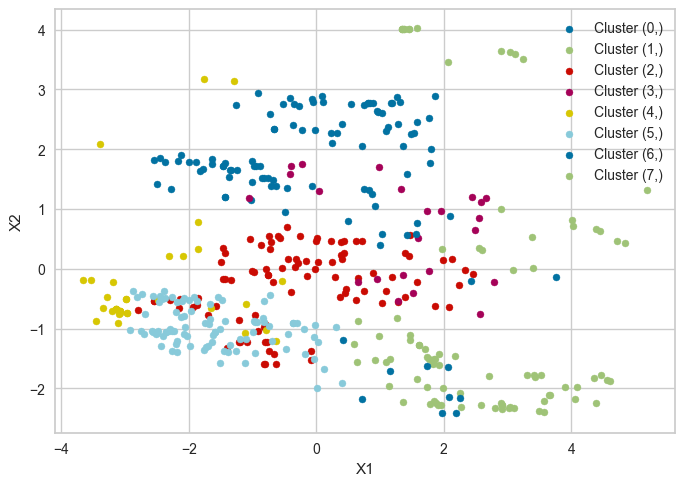

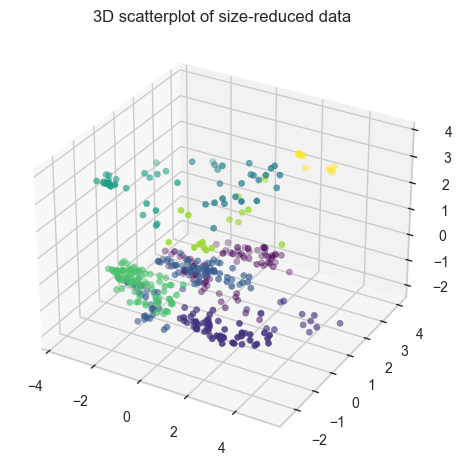

In [ ]:
ac_model_pca4 = AgglomerativeClustering(n_clusters=8, compute_distances=True)
ac_pred_pca4 = ac_model_pca4.fit_predict(data_pca4)

getScore(ac_pred_pca4, data_pca4, "PCA 4 Agglomerative")
printResult(ac_pred_pca4, data_pca4.values, None )
print3D(ac_pred_pca4, data_pca4)


### redukcija


raspoela po klasterima za kmeans

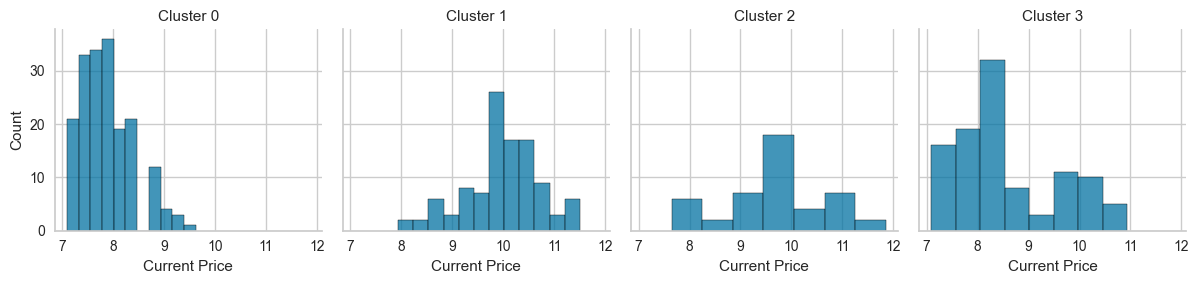

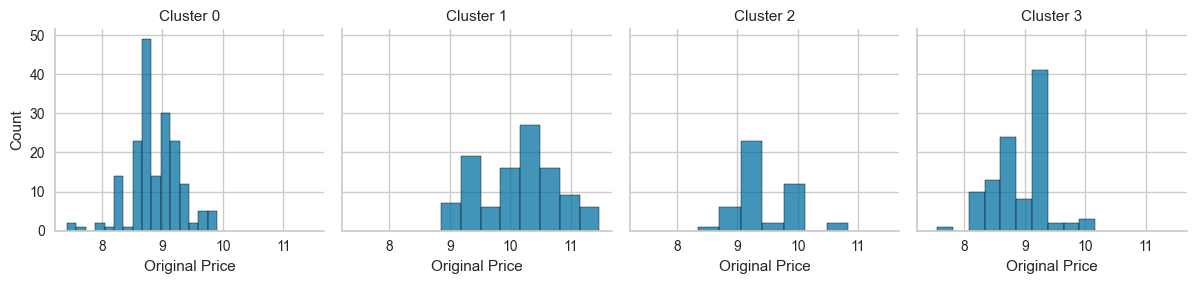

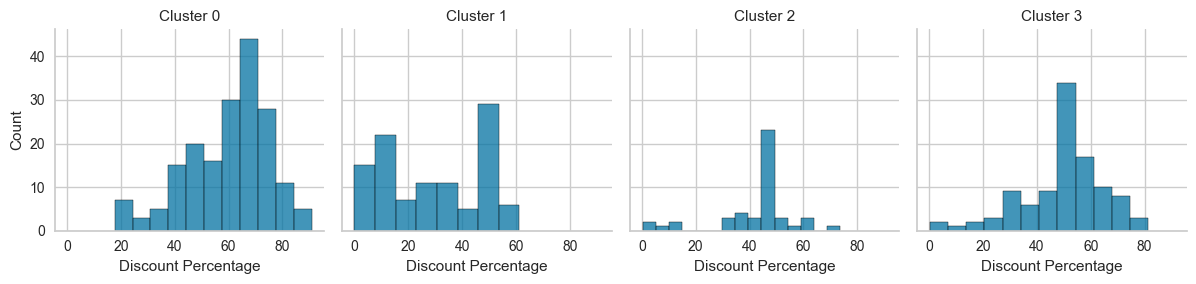

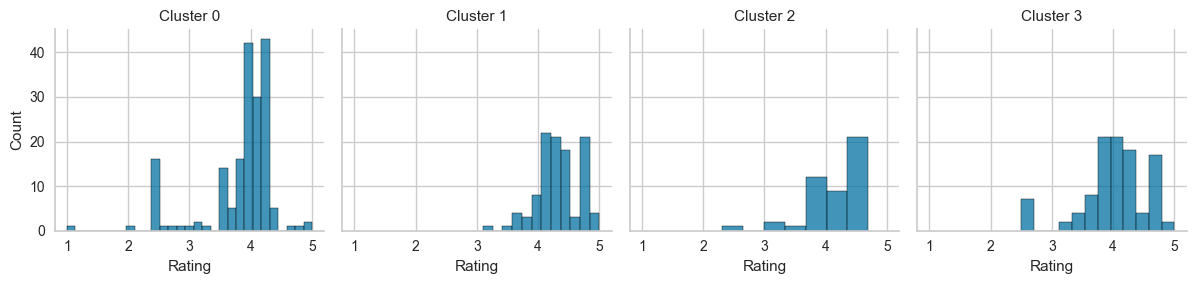

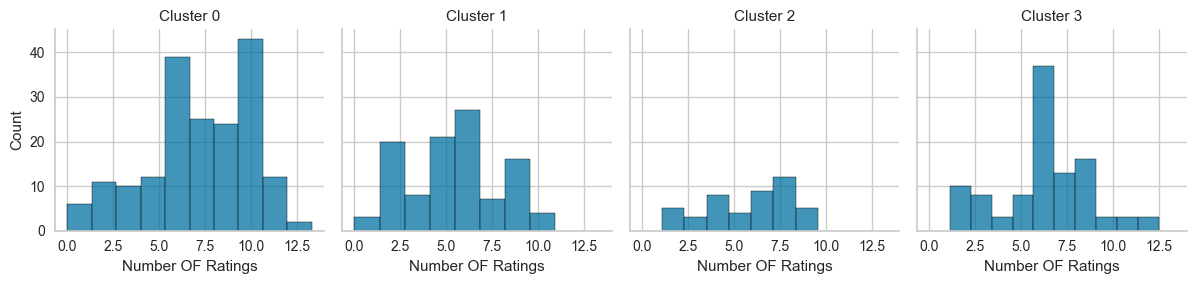

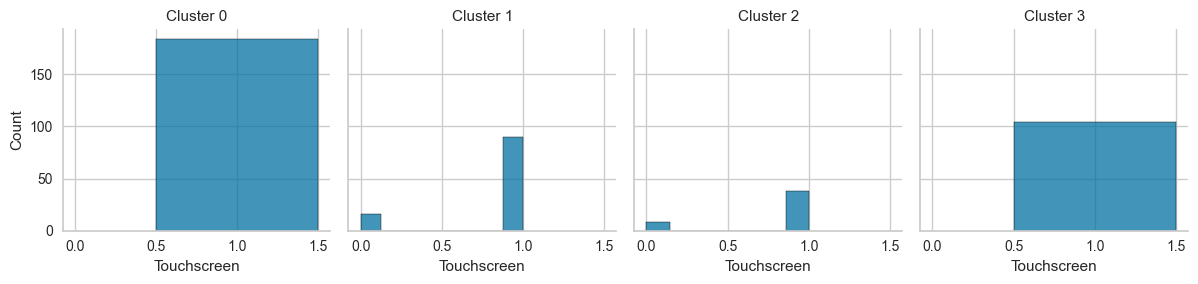

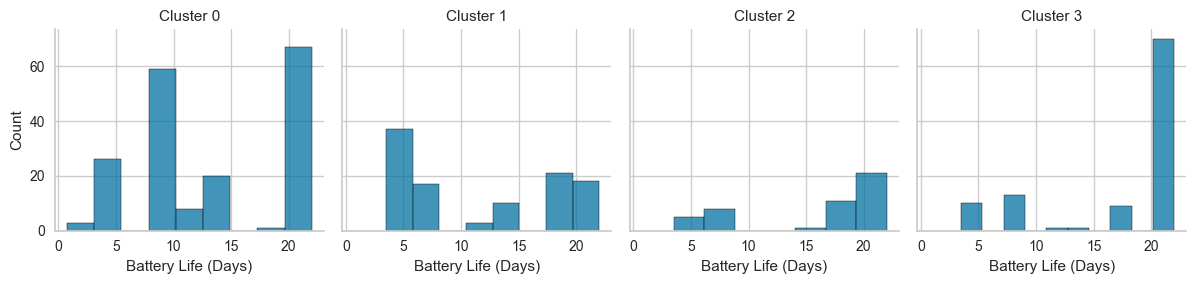

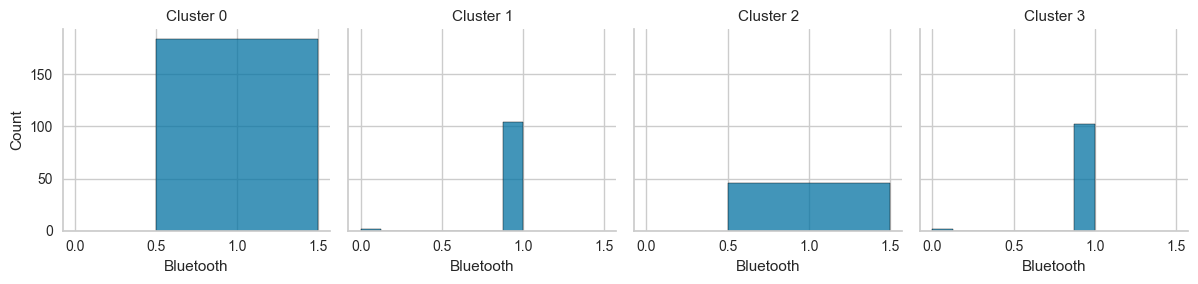

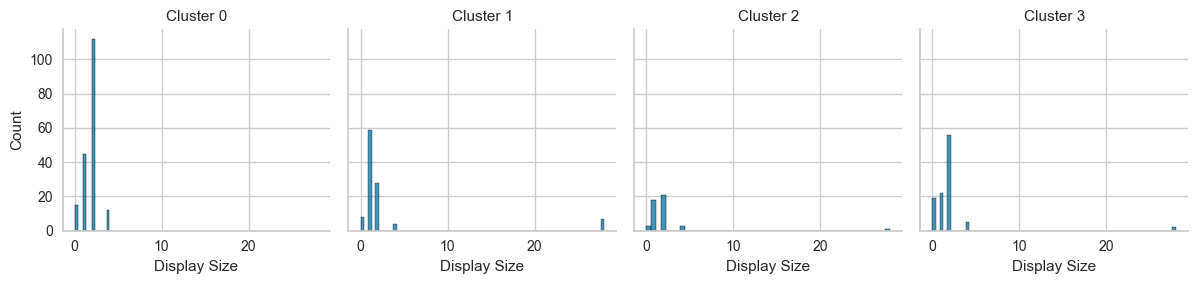

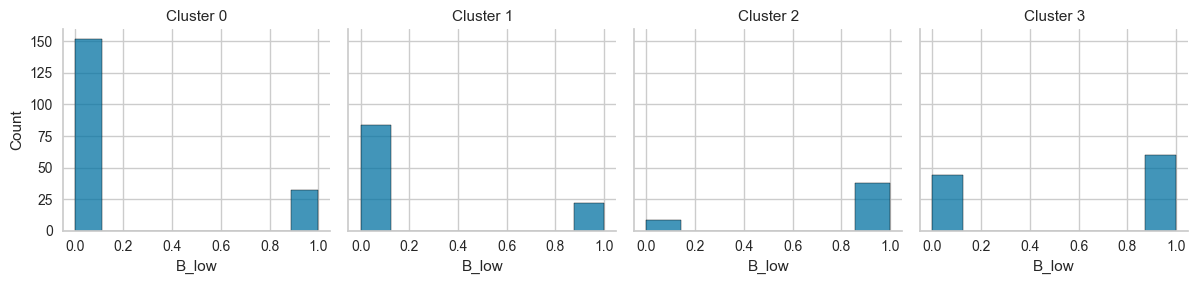

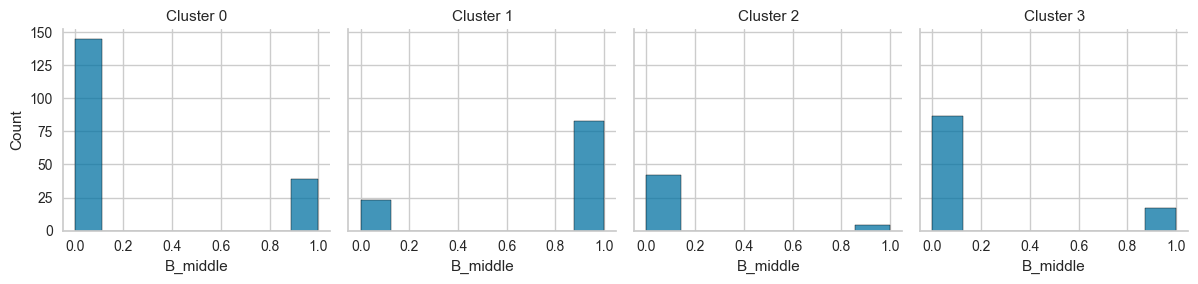

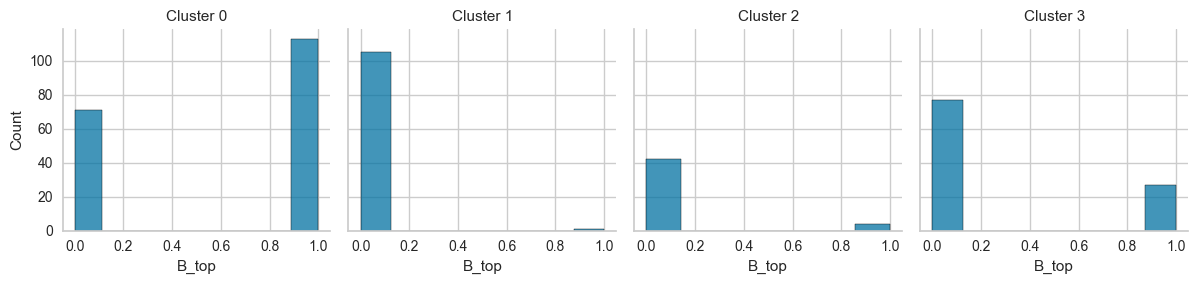

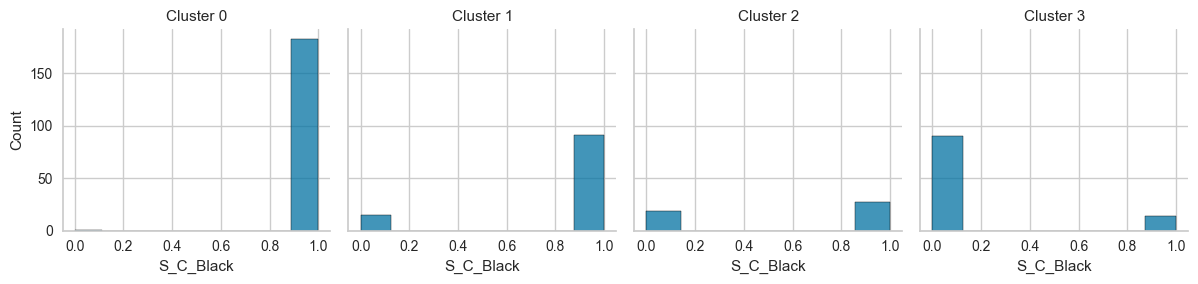

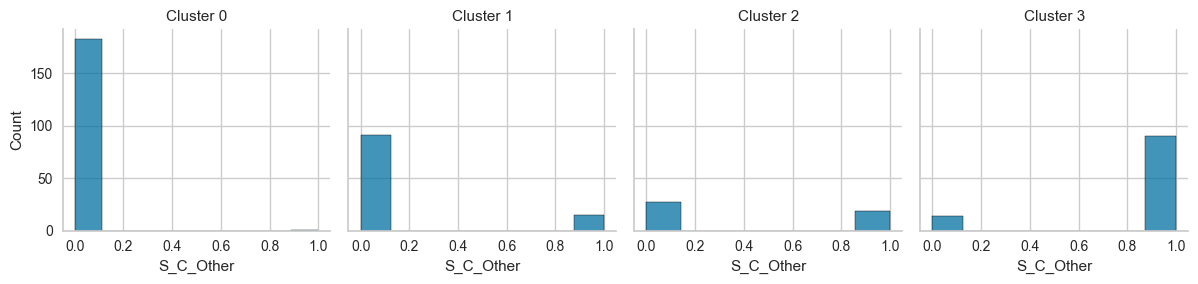

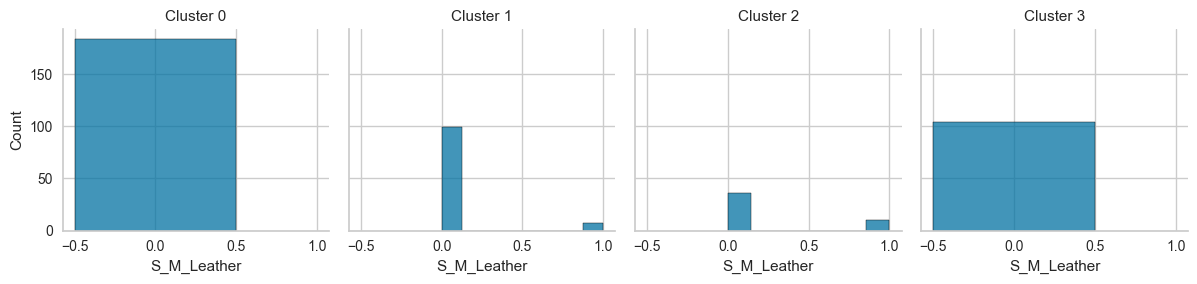

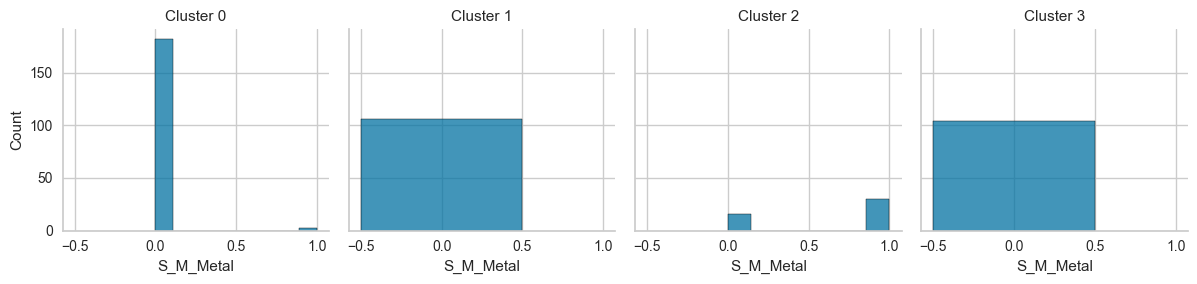

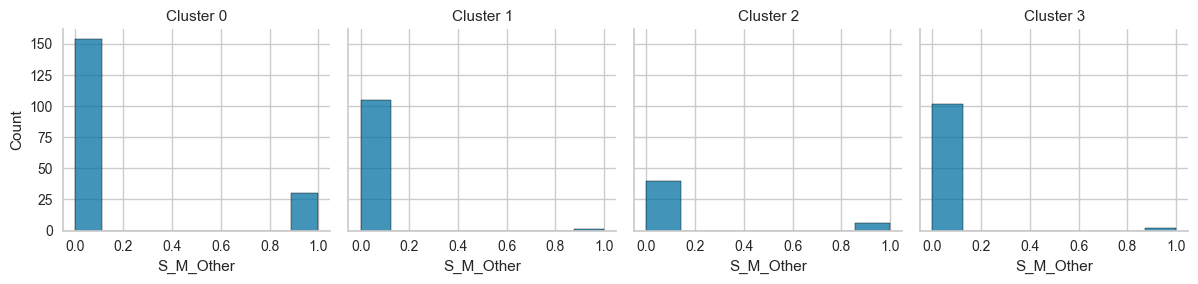

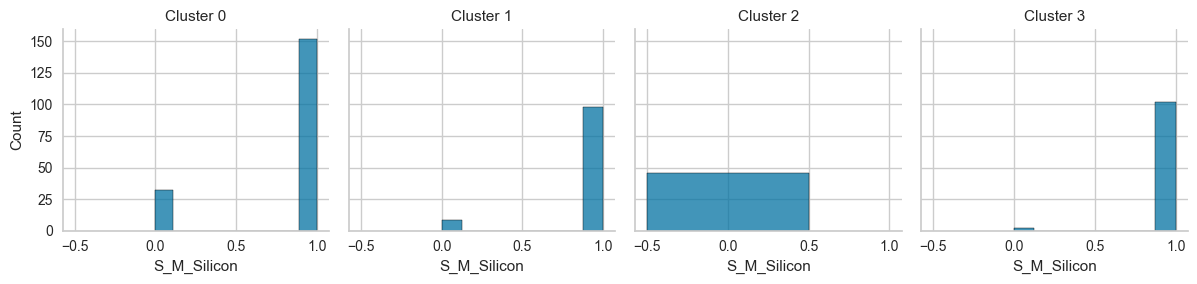

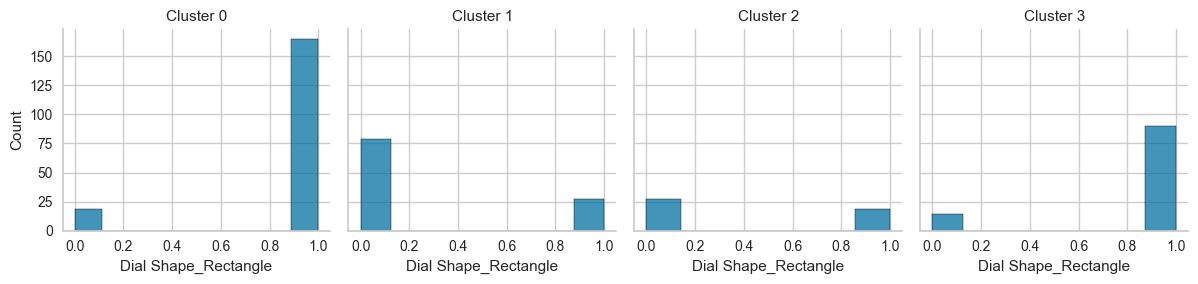

In [ ]:

df_cluster1 = data1.copy()
df_cluster1["Cluster"] = pred_kmeans_pca
cols = data1.columns
for col in cols:
    g = sns.FacetGrid(df_cluster1, col="Cluster", col_wrap=5)
    g.map(sns.histplot, col, kde=False)
    g.set_titles("Cluster {col_name}")
    plt.tight_layout()
    plt.show()

In [ ]:
data1.columns

Index(['Current Price', 'Original Price', 'Discount Percentage', 'Rating',
       'Number OF Ratings', 'Touchscreen', 'Battery Life (Days)', 'Bluetooth',
       'Display Size', 'B_low', 'B_middle', 'B_top', 'S_C_Black', 'S_C_Other',
       'S_M_Leather', 'S_M_Metal', 'S_M_Other', 'S_M_Silicon',
       'Dial Shape_Rectangle'],
      dtype='object')

izbacivanje anje bitnih kolona

In [325]:
delete_cols = [ 'Rating',
       'Number OF Ratings',
       'Touchscreen', 'Battery Life (Days)', 'Bluetooth', 'Display Size','S_M_Other',
       'S_C_Black', 'S_C_Other' ]
data2 = data1.copy()
data2.drop(columns=delete_cols, inplace=True)
data2

Current Price  Original Price  Discount Percentage  B_low  B_middle  \
0        11.326475       11.406453             7.686318  False     False   
1         8.242493        9.740910            77.651627  False     False   
2         7.600402        8.985946            74.981227  False     False   
3         7.494986        9.903438            91.004550  False     False   
4         7.377134        8.516993            68.013603  False     False   
..             ...             ...                  ...    ...       ...   
445       8.699348        9.104869            33.337037  False     False   
446       8.216088        9.210240            62.996300  False     False   
447       8.699348        9.104869            33.337037  False     False   
448       8.070906        8.987072            59.994999  False     False   
449       8.006368        8.987072            62.495312  False     False   

     B_top  S_M_Leather  S_M_Metal  S_M_Silicon  Dial Shape_Rectangle  
0     True        False      False         True                  True  
1     True        False      False         True                  True  
2     True        False      False         True                  True  
3     True        False      False         True                  True  
4     True        False      False        False                  True  
..     ...          ...        ...          ...                   ...  
445   True        False      False         True                 False  
446   True        False      False         True                  True  
447   True        False      False         True                 False  
448   True        False      False         True                  True  
449   True        False      False         True                  True  

[440 rows x 10 columns]

In [ ]:
scaler = StandardScaler()
data_st_r = scaler.fit_transform(data2)

pca1 = PCA(n_components=3, random_state=80)
pca1.fit(data_st_r)
data_pca_r = pd.DataFrame(pca1.transform(data_st_r), columns=(["f1","f2", "f3"]))
pca1.explained_variance_ratio_.cumsum()

array([0.29745268, 0.48149881, 0.63399319])

Elbow Method to determine the number of clusters to be formed:


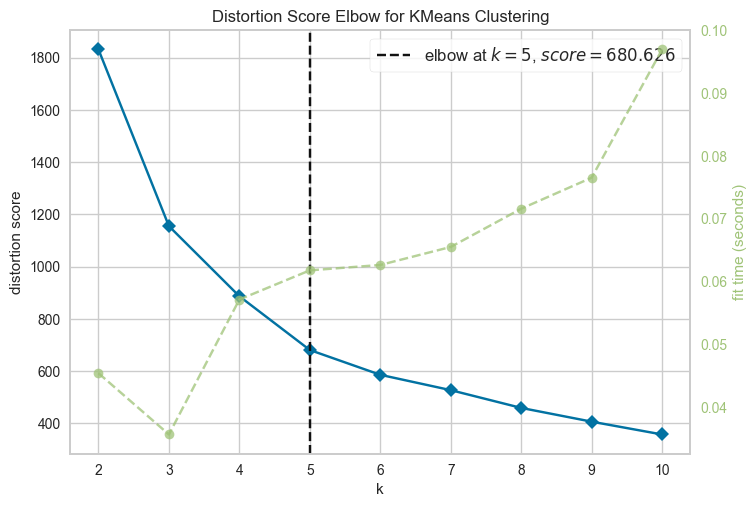

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_pca_r)
Elbow_M.show()


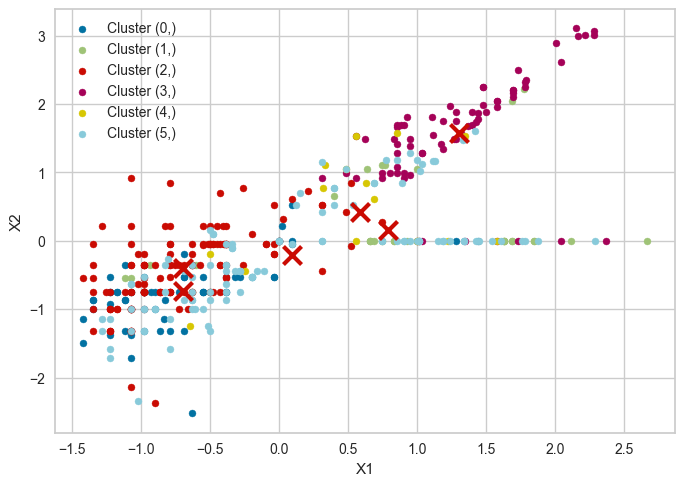

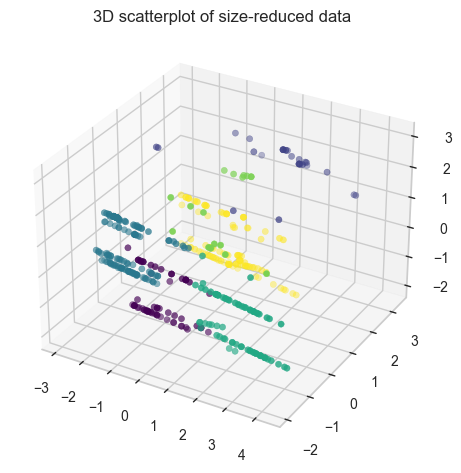

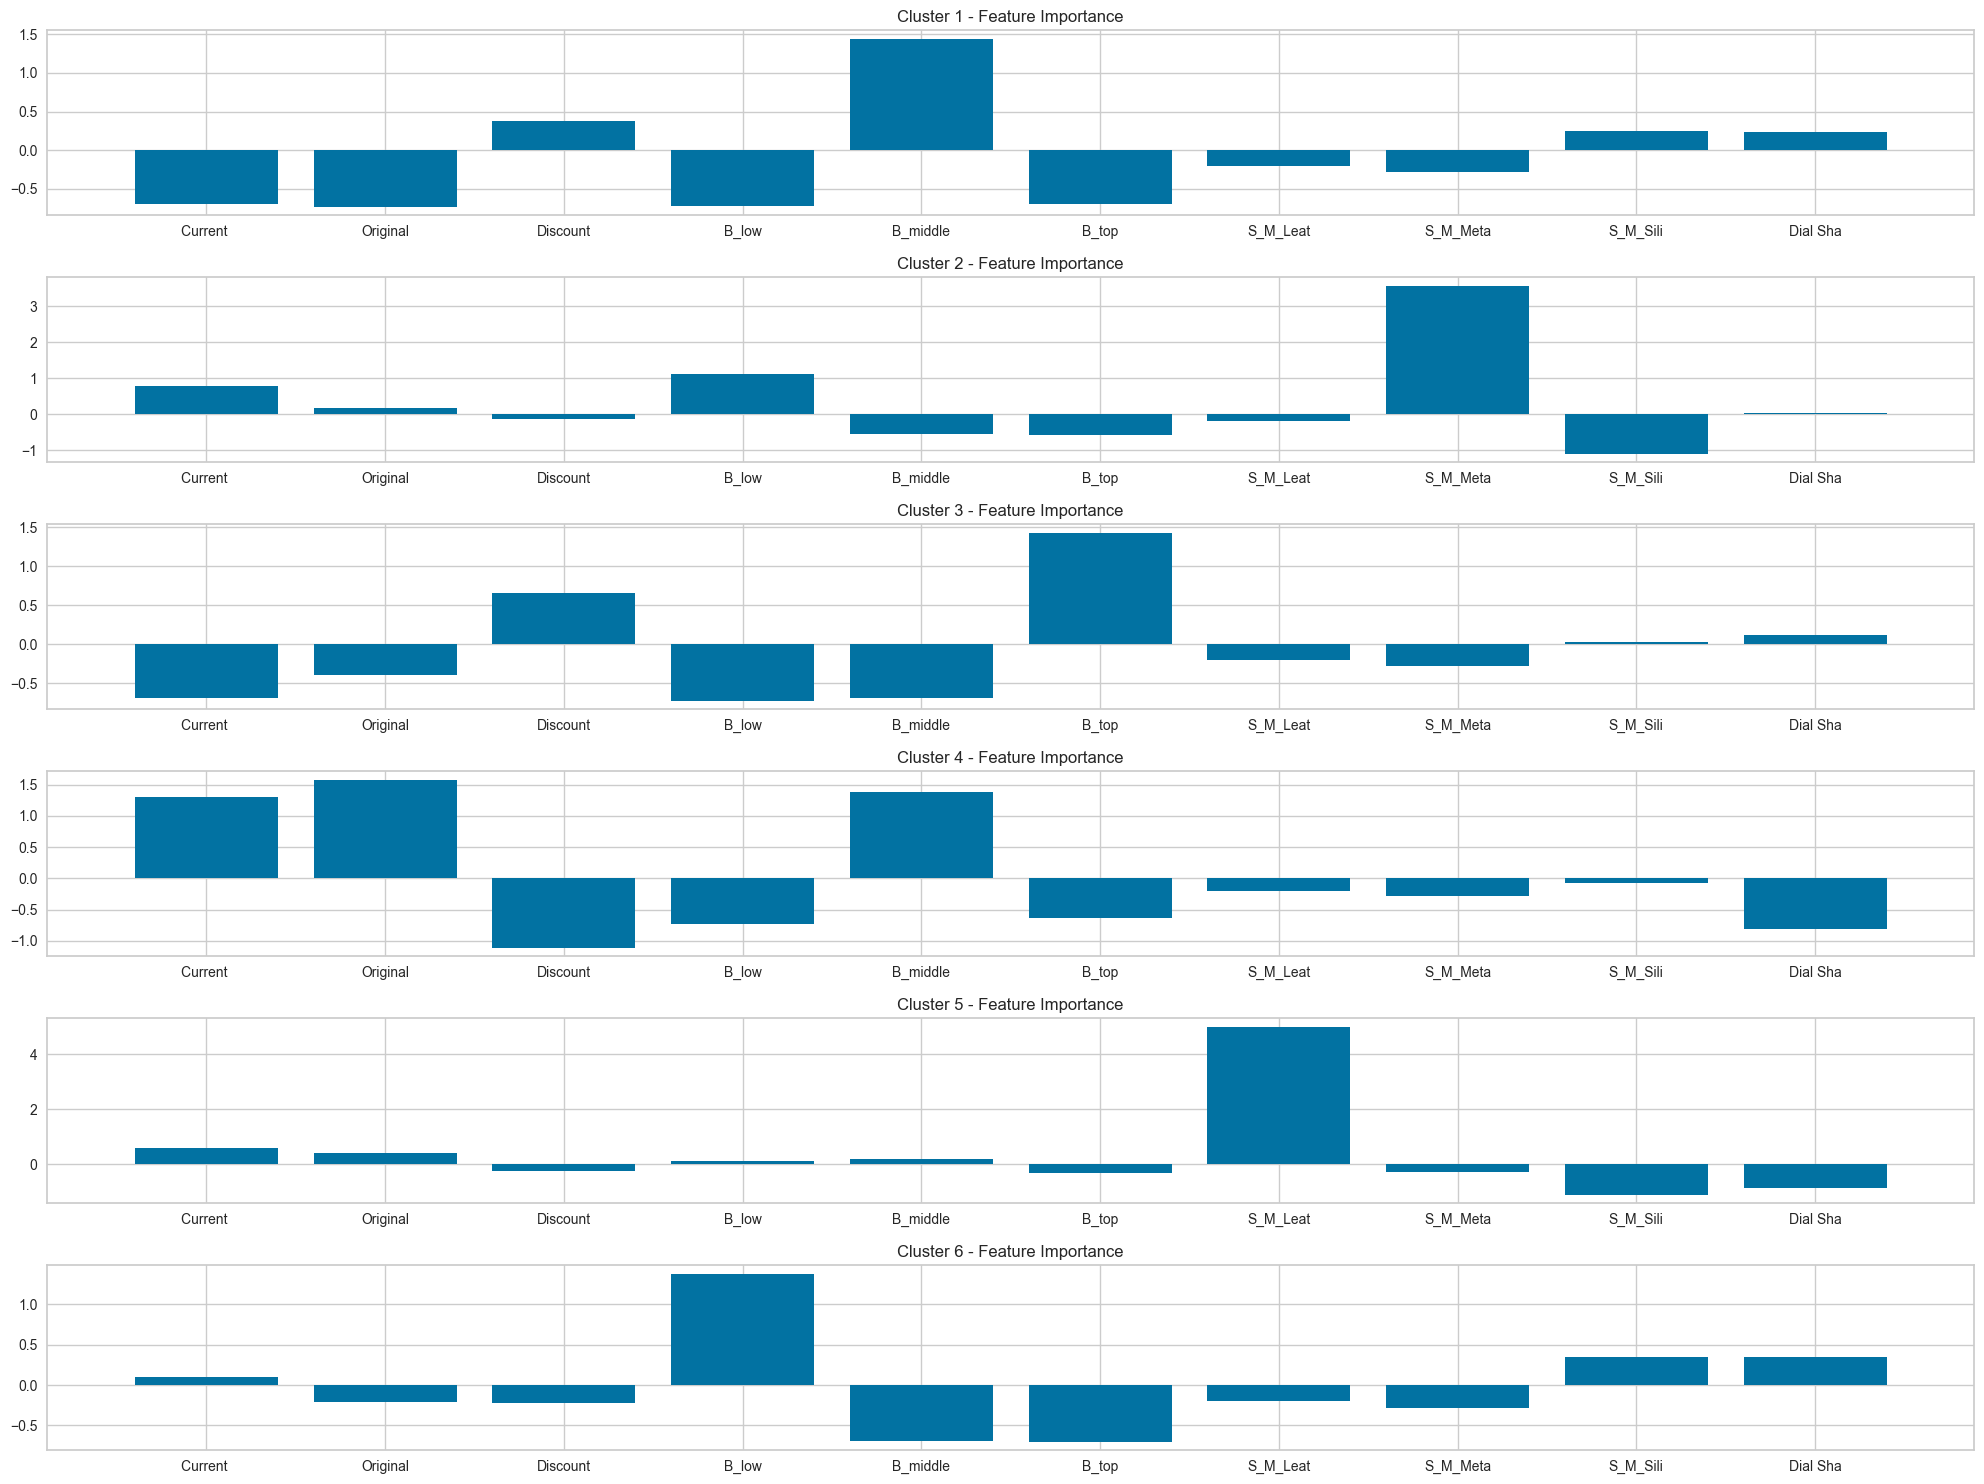

In [ ]:
kmeans_r = KMeans(n_clusters=6, n_init=50, init='k-means++', max_iter=500).fit(data_st_r)
pred_kmeans_r = kmeans_r.predict(data_st_r)
claster_center_kmeans_r = kmeans_r.cluster_centers_

labels = kmeans.labels_

printResult(pred_kmeans_r, data_st_r,claster_center_kmeans_r )
print3D(pred_kmeans_r, data_st_r)

plt.figure(figsize=(20, 15))

for i in range(len(claster_center_kmeans_r)):
    plt.subplot(len(claster_center_kmeans_r), 1, i + 1)
    plt.bar(range(data_st_r.shape[1]), claster_center_kmeans_r[i], tick_label=[f'{j[0:8]}' for j in data2.columns])
    plt.title(f'Cluster {i + 1} - Feature Importance')

plt.tight_layout()
plt.show()

calinski_harabasz_score 336.96547827737095
Silhouette score:  0.4354364554476787
Davies-Bouldin score:  0.8735553714847818


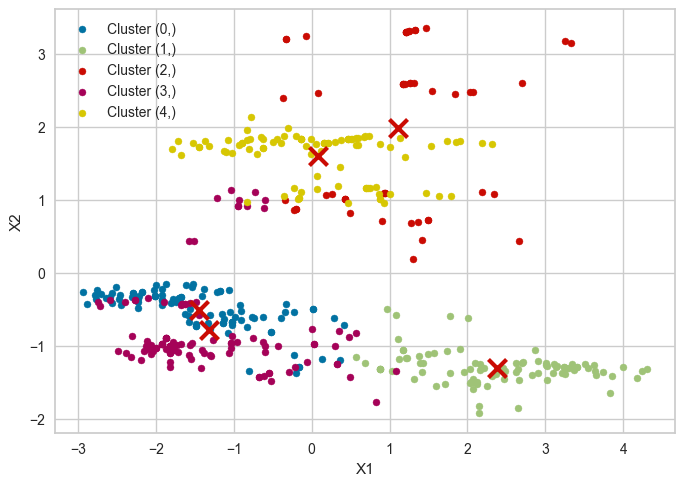

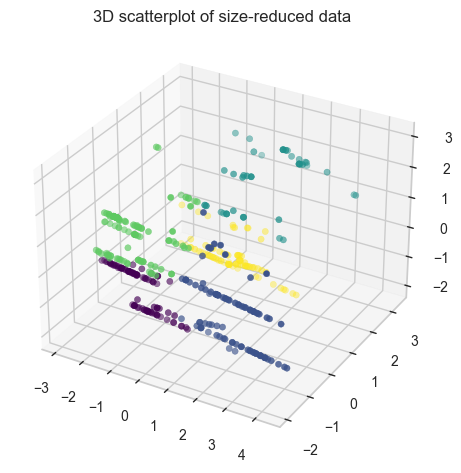

In [ ]:

kmeans_pca_r = KMeans(n_clusters=5, n_init=50, init='k-means++', max_iter=500).fit(data_pca_r)
pred_kmeans_pca_r = kmeans_pca_r.predict(data_pca_r)
claster_center_kmeans_pca_r = kmeans_pca_r.cluster_centers_

labels = kmeans.labels_

getScore(pred_kmeans_pca_r, data_pca_r, "Reduced PCA KMeans")
printResult(pred_kmeans_pca_r, data_pca_r.values,claster_center_kmeans_pca_r )
print3D(pred_kmeans_pca_r, data_pca_r)


In [324]:
# df_cluster2 = data2.copy()
# df_cluster2["Cluster"] = pred_kmeans_pca
# cols = data2.columns
# for col in cols:
#     g = sns.FacetGrid(df_cluster2, col="Cluster", col_wrap=5)
#     g.map(sns.histplot, col, kde=False)
#     g.set_titles("Cluster {col_name}")
#     plt.tight_layout()
#     plt.show()


print(data2)

    Brand  Current Price  Original Price  Discount Percentage  Rating  \
0     top      11.326475       11.406453             7.686318     4.0   
1     top       8.242493        9.740910            77.651627     4.3   
2     top       7.600402        8.985946            74.981227     3.8   
3     top       7.494986        9.903438            91.004550     4.3   
4     top       7.377134        8.516993            68.013603     4.1   
..    ...            ...             ...                  ...     ...   
424   top       8.293800        9.210240            60.006001     3.1   
426   top       8.188411        8.699348            40.006668     5.0   
431   top       8.293800        9.210240            60.006001     3.7   
434   top       7.739794        8.699348            61.693616     3.6   
442   top       8.293800        9.210240            60.006001     3.7   

     Number OF Ratings Dial Shape Strap Color Strap Material Touchscreen  \
0             4.174387        NaN         NaN  

Elbow Method to determine the number of clusters to be formed:


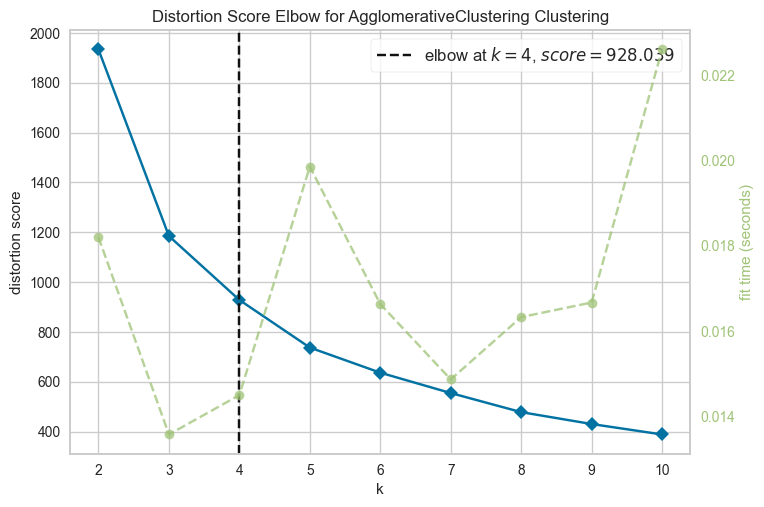

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=10)
Elbow_M.fit(data_pca_r)
Elbow_M.show()

calinski_harabasz_score 302.8998632159172
Silhouette score:  0.4126978141834346
Davies-Bouldin score:  0.9483190145842381


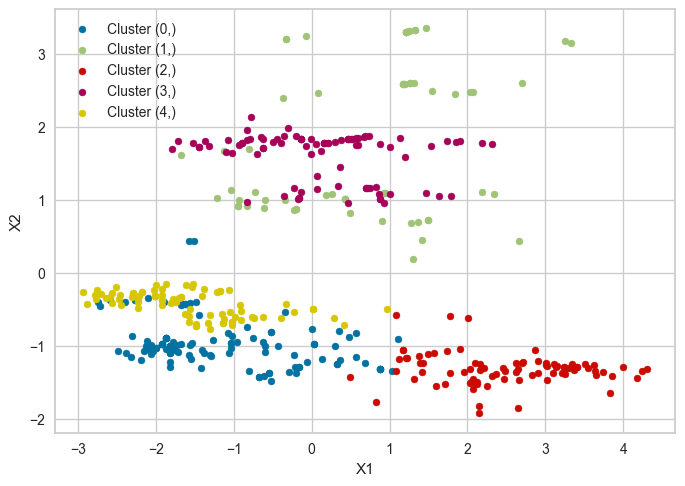

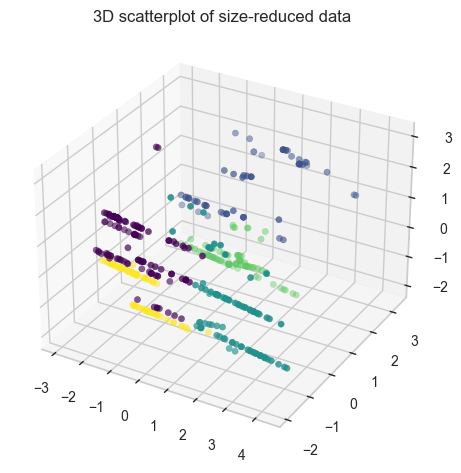

In [ ]:

ac_model_pca_r = AgglomerativeClustering(n_clusters=5, compute_distances=True)
ac_pred_pca_r = ac_model_pca_r.fit_predict(data_pca_r)

getScore(ac_pred_pca_r, data_pca_r, "Reduced PCA Agglomerative")
printResult(ac_pred_pca_r, data_pca_r.values, None )
print3D(ac_pred_pca_r, data_pca_r)


## Finalni Rezultati
---

In [ ]:
result_df.set_index("", inplace=True)

result_df.T

calinski_harabasz  Silhouette  Davies-Bouldin
KMeans                             53.855905    0.173232        1.896393
MeanShift                          18.052028    0.262601        0.865286
DBSCAN                              6.648867   -0.175208        1.084673
Agglomerative                      57.255956    0.258595        1.244702
Gaussian Mixture                   37.956719    0.059204        2.600618
Spectar clustering                 26.720180    0.035274        2.112663
PCA KMeans                        279.547484    0.374042        0.923123
PCA MeanShift                       0.000000    0.000000        0.000000
PCA DBSCAN                         29.371869    0.014993        1.344167
PCA Agglomerative                 231.139198    0.312898        1.074885
PCA Gaussian Mixture              259.101855    0.352124        0.923193
PCA Spectar clustering             29.237856   -0.095658        1.990725
PCA 4 KMeans                      184.463487    0.329941        1.119520
PCA 4 MeanShift                     0.000000    0.000000        0.000000
PCA 4 DBSCAN                       16.417306   -0.060087        1.170673
PCA 4 Agglomerative               169.405896    0.350172        0.936349
PCA 4 Gaussian Mixture              0.000000    0.000000        0.000000
PCA 4 Spectar clustering            0.000000    0.000000        0.000000
Reduced PCA Agglomerative         302.899863    0.412698        0.948319
Reduced PCA KMeans                336.965478    0.435436        0.873555